# Assignment 1- Kaggle Salary Prediction
# Harika Gaggara
# 1005480677

# Importing required modules and the dataset

In [1]:
import os
import random 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,r2_score,explained_variance_score
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.decomposition import PCA
import itertools
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

Salaries = pd.read_csv("multipleChoiceResponses.csv", low_memory = False)

### 1. Drop rows missing target variable

In [2]:
Salaries.dropna(subset=['Q9'],inplace=True) 

In [3]:
Salaries.Q9.unique() 

array(['What is your current yearly compensation (approximate $USD)?',
       '10-20,000', '0-10,000',
       'I do not wish to disclose my approximate yearly compensation',
       '20-30,000', '125-150,000', '30-40,000', '50-60,000',
       '100-125,000', '90-100,000', '70-80,000', '80-90,000', '60-70,000',
       '400-500,000', '40-50,000', '150-200,000', '500,000+',
       '300-400,000', '200-250,000', '250-300,000'], dtype=object)

### 2. Remove rows where salary is not disclosed

In [4]:
Salaries = Salaries[Salaries['Q9']!= "I do not wish to disclose my approximate yearly compensation"]

### 3. Add Index Column

In [5]:
Salaries.loc[1:,'index'] = Salaries[1:].reset_index().index

### 4. Exported to new file

In [6]:
Salaries.to_csv("Kaggle_Salary_clean.csv")

In [7]:
class my_dictionary(dict): 
  # __init__ function 
    def __init__(self): 
        self = dict() 
          
    # Function to add key:value 
    def add(self, key, value): 
        self[key] = value 


In [8]:
Salaries.head()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,index
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,NaN
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1,1.0
5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,2.0
7,959,Male,-1,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,1,Academics/Education,...,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN,-1,3.0


### Converting the experience column into proper format

In [9]:
Salaries['Q8'] = Salaries['Q8'].str.replace('/', '-')
Salaries['Q8'].head(5)

0    How many years of experience do you have in yo...
2                                                 5-10
3                                                  0-1
5                                                  0-1
7                                                10-15
Name: Q8, dtype: object

# DATA Cleaning and Subsetting


**Dropping the columns with TEXT, Other, None in their name as there is not much information we 
can deduce from them**

In [10]:
drop_list = list(filter(lambda x: 'TEXT' in x, list(Salaries.columns))) 


obj_temp = list(Salaries.iloc[0].dropna())
listing = ['Other', 'other', 'None', 'none']
for i in range(len(obj_temp)):
    for j in listing:
        if j in obj_temp[i]:
            drop_list.append(Salaries.columns[i])
len(drop_list)

103

In [11]:
len(set(drop_list))  #dropped 74 columns

74

In [12]:
res_df = Salaries.drop(columns=drop_list, axis=1) # dropping the unnecessary columns
res_df.describe()

,index
count,15429.000000
mean,7714.000000
std,4454.112987
min,0.000000
25%,3857.000000
50%,7714.000000
75%,11571.000000
max,15428.000000


# Creating a dictionary with the actual count of values for each column

In [13]:
my_dict = my_dictionary()
for i in (res_df.columns):
    dummy =res_df[i].count()
    my_dict.add(i, dummy)

In [14]:
res_df.shape

(15430, 322)

# *Dropping columns with less than 500 entries*

I feel we will not be able to extract much information from these columns are most of which are empty 
Hence dropping them.

In [15]:

df = pd.DataFrame.from_dict(my_dict, orient='index', columns=['count'])
new_drop = list(df[df['count'] <=500].index) +drop_list
len(new_drop)

207

In [16]:
res_df = Salaries.drop(columns=new_drop, axis=1) # dropping the columns
res_df.describe()

,index
count,15429.000000
mean,7714.000000
std,4454.112987
min,0.000000
25%,3857.000000
50%,7714.000000
75%,11571.000000
max,15428.000000


In [17]:
res_df.shape

(15430, 218)

# Dropping the columns which are not very useful for the analysis
*After manual observation through the columns found the below columns not very useful for the analysis as it might overfit the data I am eliminating these columns*

In [18]:

final_drop = ['Q32','Q33_Part_1','Q33_Part_2','Q33_Part_3','Q33_Part_4','Q33_Part_5',\
'Q33_Part_6','Q33_Part_7','Q33_Part_8','Q33_Part_9','Q39_Part_1','Q39_Part_2','Q40','Q41_Part_1',\
'Q41_Part_2','Q41_Part_3','Q42_Part_1','Q42_Part_2','Q42_Part_3','Q42_Part_4','Q43','Q44_Part_1',\
'Q44_Part_2','Q44_Part_3','Q44_Part_4','Q44_Part_6','Q45_Part_1','Q45_Part_2','Q45_Part_3','Q45_Part_4',\
'Q45_Part_5','Q45_Part_6','Q46','Q47_Part_1','Q47_Part_2','Q47_Part_3','Q47_Part_4','Q47_Part_5',\
'Q47_Part_6','Q47_Part_7','Q47_Part_8','Q47_Part_9','Q47_Part_10','Q47_Part_11','Q47_Part_13',\
'Q48','Q49_Part_1','Q49_Part_2','Q49_Part_3','Q49_Part_4','Q49_Part_5','Q49_Part_6','Q49_Part_7',\
'Q49_Part_8','Q49_Part_9','Q49_Part_10','Q50_Part_1','Q50_Part_2','Q50_Part_3','Q50_Part_5']

res_df = res_df.drop(columns=final_drop, axis=1)

In [19]:
result_df = res_df.copy()
res_df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q38_Part_6,Q38_Part_10,Q38_Part_11,Q38_Part_12,Q38_Part_13,Q38_Part_14,Q38_Part_15,Q38_Part_17,Q38_Part_18,index
0,Duration (in seconds),What is your gender? - Selected Choice,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,In what industry is your current employer/cont...,How many years of experience do you have in yo...,What is your current yearly compensation (appr...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,NaN
2,434,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,"10-20,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,718,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,"0-10,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5,731,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,"0-10,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
7,959,Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,"10-20,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [20]:
res_df = res_df.drop(res_df.index[0]) # drop the first row containing the questions as it was interfering with the analysis
res_df.rename(columns={'Time from Start to Finish (seconds)':'Time'},inplace=True) # renaming time from start to finish to Time 
res_df.columns

Index(['Time', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9',
       ...
       'Q38_Part_6', 'Q38_Part_10', 'Q38_Part_11', 'Q38_Part_12',
       'Q38_Part_13', 'Q38_Part_14', 'Q38_Part_15', 'Q38_Part_17',
       'Q38_Part_18', 'index'],
      dtype='object', length=158)

*Saving the slightly cleaned dataframe to a csv so that when we read it again, the data
types will be read in properly . earlier ,due to the second row of questions, pd read 
csv function could not interpret all the data types properly*

In [21]:
res_df.to_csv('res_df.csv')  # Write to csv so that we can read properly 

In [22]:
df1 = pd.read_csv('res_df.csv',) # reading the clean csv file

In [23]:
df1.head()


,Unnamed: 0,Time,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q38_Part_6,Q38_Part_10,Q38_Part_11,Q38_Part_12,Q38_Part_13,Q38_Part_14,Q38_Part_15,Q38_Part_17,Q38_Part_18,index
0,2,434,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,3,718,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,5,731,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,7,959,Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,8,1758,Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium Blog Posts,4.0


In [24]:
df1.pop('Unnamed: 0'); # getting rid of the pesky pseudo index column "Unnamed: 0"

In [25]:
df1.dtypes.value_counts() # earlier since all the columns had a question row, pandas could not infer the data types properly  

object     145
float64     12
int64        1
dtype: int64

In [26]:
df1.head()

,Time,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q38_Part_6,Q38_Part_10,Q38_Part_11,Q38_Part_12,Q38_Part_13,Q38_Part_14,Q38_Part_15,Q38_Part_17,Q38_Part_18,index
0,434,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,"10-20,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,718,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,"0-10,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,731,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,"0-10,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,959,Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,"10-20,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,1758,Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,"0-10,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium Blog Posts,4.0


In [27]:
df1.loc[:,df1.dtypes.values == "int64"].head() # checking the columns with int data type

,Time
0,434
1,718
2,731
3,959
4,1758


In [28]:
df1.loc[:,df1.dtypes.values == "float64"].head()  #checking the column with float data type

,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q35_Part_1,Q35_Part_2,Q35_Part_3,Q35_Part_4,Q35_Part_5,index
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2.0,3.0,20.0,50.0,20.0,0.0,0.0,0.0,0.0,100.0,0.0,1.0
2,10.0,10.0,20.0,10.0,20.0,23.0,20.0,40.0,20.0,20.0,0.0,2.0
3,0.0,30.0,50.0,0.0,0.0,20.0,50.0,20.0,30.0,0.0,0.0,3.0
4,20.0,30.0,20.0,20.0,5.0,5.0,75.0,5.0,20.0,0.0,0.0,4.0


In [29]:
df1['Q9'].value_counts()

df_dummy = df1.copy()

# Cleaning outliers and data that clearly looks flawed

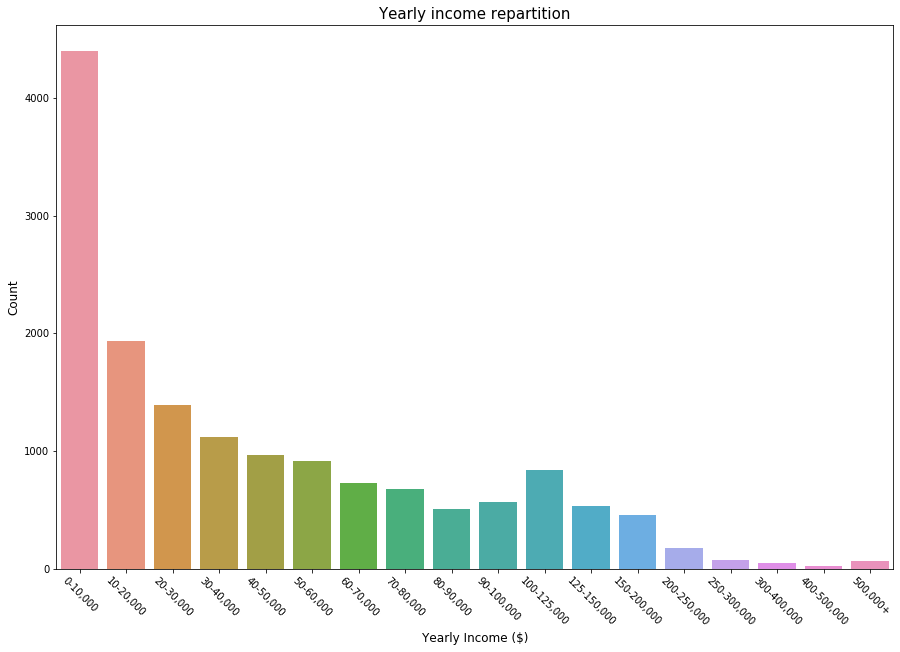

In [30]:
# lets look at the salary distribution
order = ['0-10,000', '10-20,000', '20-30,000', '30-40,000', '40-50,000', 
  '50-60,000', '60-70,000', '70-80,000', '80-90,000', '90-100,000', 
  '100-125,000', '125-150,000', '150-200,000', '200-250,000', '250-300,000', 
  '300-400,000', '400-500,000', '500,000+']

plt.figure(figsize=(15,10))
sns.countplot(df1['Q9'], order=order)
plt.xticks(rotation=-45)
plt.xlabel("Yearly Income ($)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Yearly income repartition", fontsize=15)
plt.show()

*Let us say we want to predict the income in thousands of USD. I will tackle the problem 
as a classification one. In fact, a regression one will give a bad accuracy on lower salaries. 
I believe it is more important to make a distinction between earn 40k and 60k than between 
earning 300k and 500k.*

**Therefore I make 8 categories :**

    1.less than 10k
    2.between 10k and 30k
    3.between 30k and 50k
    4.between 50k and 80k
    5.between 80k and 125k
    6.between 125k and 200k
    7.between 200k and 300k
    8.more than 300k

In [31]:
new = df1["Q9"].str.split("-", n = 1, expand = True) 
new[1].dropna(inplace=True) 
# # making separate first name column from new data frame 
df1['Q9_upper']= new[1].str.replace(',', '').astype(str).astype(int)
  
# # making separate last name column from new data frame 
df1['Q9_lower']= new[0].str.replace(',', '').astype(str)
dic = {'0-10,000': 5000, '10-20,000': 15000, '20-30,000': 25000, '30-40,000': 35000, 
       '40-50,000': 45000, '50-60,000': 55000, '60-70,000': 65000, '70-80,000': 75000, 
       '80-90,000': 85000, '90-100,000': 95000, '100-125,000': 112500, 
       '125-150,000': 137500, '150-200,000': 175000, '200-250,000': 225000, 
       '250-300,000': 275000, '300-400,000': 350000, '400-500,000': 450000, 
       '500,000+':500000}

classes = ['less than 10k', 'between 10k and 30k', 'between 30k and 50k',\
           'between 50k and 80k', 'between 80k and 125k', 'more than 125k']
dic_target = {'0-10,000': 0, '10-20,000': 1, '20-30,000': 1, '30-40,000': 2, 
       '40-50,000': 2, '50-60,000': 3, '60-70,000': 3, '70-80,000': 3, 
       '80-90,000': 4, '90-100,000': 4, '100-125,000': 4, 
       '125-150,000': 5, '150-200,000': 5, '200-250,000': 5, 
       '250-300,000': 5, '300-400,000': 5, '400-500,000': 5, 
       '500,000+':5}

df1['target'] = df1['Q9'].apply(lambda x: dic[x])
df1['final_target'] = df1['Q9'].apply(lambda x: dic_target[x])
df1 = df1.drop(columns='Q9', axis=1)

In [32]:
df1['target'].value_counts()

5000      4398
15000     1937
25000     1395
35000     1119
45000      965
55000      919
112500     843
65000      729
75000      677
95000      566
137500     533
85000      506
175000     457
225000     172
275000      75
500000      63
350000      52
450000      23
Name: target, dtype: int64

**looking at very high salary and very low experience to check for anomalies**

In [33]:

df1[((df1['target']>300000)  & (df1.Q8 == '0-1') & (df1.Q6 != 'Chief Officer'))].head(5)

,Time,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q10,...,Q38_Part_13,Q38_Part_14,Q38_Part_15,Q38_Part_17,Q38_Part_18,index,Q9_upper,Q9_lower,target,final_target
3575,762,Male,35-39,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,Other,0-1,"We have well established ML methods (i.e., mod...",...,NaN,KDnuggets Blog,NaN,NaN,NaN,3575.0,400000.0,300,350000,5
5927,176970,Female,22-24,India,Master’s degree,"Computer science (software engineering, etc.)",Research Scientist,Computers/Technology,0-1,We use ML methods for generating insights (but...,...,NaN,KDnuggets Blog,NaN,NaN,Medium Blog Posts,5927.0,400000.0,300,350000,5
7522,359,Prefer not to say,80+,Other,I prefer not to answer,Fine arts or performing arts,Other,Manufacturing/Fabrication,0-1,I do not know,...,NaN,NaN,NaN,NaN,NaN,7522.0,NaN,500000+,500000,5
10817,121,Female,22-24,India,Master’s degree,"Computer science (software engineering, etc.)",Data Analyst,Academics/Education,0-1,We are exploring ML methods (and may one day p...,...,NaN,NaN,NaN,NaN,NaN,10817.0,NaN,500000+,500000,5
11041,369,Male,30-34,United States of America,Doctoral degree,Other,Data Scientist,Hospitality/Entertainment/Sports,0-1,"We have well established ML methods (i.e., mod...",...,NaN,NaN,NaN,NaN,NaN,11041.0,400000.0,300,350000,5


In [34]:
index_drp = df1[((df1['target']>300000)  & (df1.Q8 == '0-1') & (df1.Q6 != 'Chief Officer'))].index
index_drp # get the index of the above anomalies 

Int64Index([ 3575,  5927,  7522, 10817, 11041, 11126, 11415, 11986, 12291,
            12909, 14025, 14027, 14768, 14812],
           dtype='int64')

In [35]:
df1.drop(index_drp,axis=0,inplace=True) # drop the rows

In [36]:
df1.reset_index(drop=True,inplace=True)# reset index to keep the shape and indexing 

In [37]:
df1.shape

(15415, 161)

*After carrying out the data exploration and creating a data dictionary, below are the 
columns which has mutiple choice answers in each columns rather than spread out like columns 
like Q11 or Q13*

In [38]:
cols_mult = ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q10','Q12_MULTIPLE_CHOICE','Q17',\
             'Q18','Q20','Q22','Q23','Q24','Q25','Q37']

# lets see how many Nans are there in each of these columns and figure out how to clean them

In [39]:
Ques = []
nan_cols = []
nans = []
# this loop will print number of NaNs in each selected columns 
for col in cols_mult:
    print('#########################################')
    print('Nulls','in',col,'(',Salaries[col].iloc[0],')''=', df1[col].isnull().sum())
    if df1[col].isnull().sum() >0 :
        nan_cols.append(col)
        nans.append(df1[col].isnull().sum())
        Ques.append(Salaries[col].iloc[0])
        
    print(df1[col].value_counts(dropna = False))

#########################################
Nulls in Q1 ( What is your gender? - Selected Choice )= 0
Male                       12858
Female                      2375
Prefer not to say            129
Prefer to self-describe       53
Name: Q1, dtype: int64
#########################################
Nulls in Q2 ( What is your age (# years)? )= 0
25-29    4275
22-24    2888
30-34    2817
35-39    1636
18-21    1362
40-44     989
45-49     602
50-54     403
55-59     222
60-69     180
70-79      26
80+        15
Name: Q2, dtype: int64
#########################################
Nulls in Q3 ( In which country do you currently reside? )= 0
United States of America                                3390
India                                                   2313
China                                                    870
Other                                                    675
Russia                                                   581
Brazil                                                   

In [40]:
# that was pretty big list , lets summarise them by only looking at the columns with NaNs from the earlier subset
pd.DataFrame(list(zip(nan_cols,Ques,nans)),columns= ['Number','Question', 'Number of Nans'])

,Number,Question,Number of Nans
0,Q5,Which best describes your undergraduate major?...,135
1,Q8,How many years of experience do you have in yo...,76
2,Q10,Does your current employer incorporate machine...,292
3,Q12_MULTIPLE_CHOICE,What is the primary tool that you use at work ...,1566
4,Q17,What specific programming language do you use ...,4332
5,Q18,What programming language would you recommend ...,1815
6,Q20,Of the choices that you selected in the previo...,5758
7,Q22,Of the choices that you selected in the previo...,6231
8,Q23,Approximately what percent of your time at wor...,1961
9,Q24,How long have you been writing code to analyze...,1980


In [41]:
df1.reset_index(drop=True); # lets reset the index before proceeding

In [42]:
list(set(cols_mult) - set(nan_cols))

['Q1', 'Q2', 'Q3', 'Q7', 'Q6', 'Q4']

### Q6', 'Q2', 'Q3', 'Q1', 'Q4', 'Q7' columns do not have any missing values so I ll leave them alone
### Lets look at the salaries . I see quite a number of outliers . let's investigate


In [43]:
df1.target.quantile(0.01) # looking at the 1 percentile salary 

5000.0

In [44]:
df1.target.quantile(0.995) # looking at the 99.5 percentile salary 

450000.0

In [45]:
outlier_index=[]
for i in range(df1.shape[0]):
    if ((df1.target.iloc[i] < df1.target.quantile(0.01)) | 
        (df1.target.iloc[i] > df1.target.quantile(0.995))):
        outlier_index.append(i)

In [46]:
len(outlier_index)

57

In [47]:
df1.shape

(15415, 161)

In [48]:
# lets look at the sum of NaNs across the rows 
df1.iloc[outlier_index,:].isnull().sum(axis=1)

266      111
1061      93
1646     141
2290     111
2543     115
3034      99
3588      78
4852     107
5405      73
5726      93
5990      98
6597     105
6613      89
6818      73
7023      69
8262       2
8289      85
8338      79
8959     105
9125      73
9927      99
9968      19
10296     72
10314     14
10533    121
10539     94
10635     80
10930    147
10970    147
10987    129
11129    112
11228    148
11328    100
11403    142
11437    106
11459    147
11598    113
11742    146
11766    145
11796    123
11819    145
11859    147
12669    141
12710    114
13074    145
13251    132
13298    145
13332    116
13441    100
13453    146
13455    144
13591    118
13885    145
14121    147
14663    136
15044     82
15308    148
dtype: int64

In [49]:
df1.iloc[outlier_index,:].isnull().sum(axis=1).sum()/len(outlier_index)

109.71929824561404

In [50]:
df1.shape

(15415, 161)

* There are quite a lot of missing data across the rows for these 57 rows and the salaries 
are quite extremes which I feel is not correct. This will prevent the model from generalizing.
So I decided to drop these rows

In [51]:
df1.drop(outlier_index,axis=0,inplace=True)

In [52]:
df1.reset_index(inplace=True,drop=True)

# Q5 - Which best describes your undergraduate major?

In [53]:
print('Nulls =', df1.Q5.isnull().sum())
df1.Q5.value_counts(dropna=False)

Nulls = 129


Computer science (software engineering, etc.)                    5908
Engineering (non-computer focused)                               2459
Mathematics or statistics                                        2067
A business discipline (accounting, economics, finance, etc.)     1287
Physics or astronomy                                              839
Information technology, networking, or system administration      639
Medical or life sciences (biology, chemistry, medicine, etc.)     613
Other                                                             496
Social sciences (anthropology, psychology, sociology, etc.)       413
Humanities (history, literature, philosophy, etc.)                210
Environmental science or geology                                  174
NaN                                                               129
I never declared a major                                           66
Fine arts or performing arts                                       58
Name: Q5, dtype: int

In [54]:
df1[(df1.Q5.isnull())].tail() 

,Time,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q10,...,Q38_Part_13,Q38_Part_14,Q38_Part_15,Q38_Part_17,Q38_Part_18,index,Q9_upper,Q9_lower,target,final_target
15058,26124,Female,25-29,Russia,No formal education past high school,NaN,Data Scientist,Accounting/Finance,1-2,"We recently started using ML methods (i.e., mo...",...,NaN,NaN,NaN,NaN,NaN,15128.0,10000.0,0,5000,0
15064,125,Male,18-21,Austria,No formal education past high school,NaN,Software Engineer,Computers/Technology,2-3,No (we do not use ML methods),...,NaN,NaN,NaN,NaN,NaN,15134.0,50000.0,40,45000,2
15087,2323,Male,50-54,Ukraine,No formal education past high school,NaN,Software Engineer,Accounting/Finance,20-25,No (we do not use ML methods),...,NaN,NaN,NaN,NaN,NaN,15157.0,50000.0,40,45000,2
15128,291,Male,40-44,Other,No formal education past high school,NaN,Chief Officer,Accounting/Finance,4-5,"We recently started using ML methods (i.e., mo...",...,NaN,NaN,NaN,NaN,NaN,15198.0,90000.0,80,85000,4
15212,1127,Male,25-29,Russia,No formal education past high school,NaN,Software Engineer,Other,5-10,We are exploring ML methods (and may one day p...,...,NaN,NaN,NaN,NaN,Medium Blog Posts,15282.0,30000.0,20,25000,1


### Looking at the dataset it is quite evident that all the NaNs are with people who do not have any formal education past high school . so we can replace Nans with ' No_undergrad'¶

In [55]:
df1.Q5.fillna(value='No_undergrad',inplace=True)

In [56]:
df1.Q5.isnull().sum()

0

# Q8 - How many years of experience do you have in your position?

In [57]:
df1[(df1.Q8.isnull())].head() 

,Time,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q10,...,Q38_Part_13,Q38_Part_14,Q38_Part_15,Q38_Part_17,Q38_Part_18,index,Q9_upper,Q9_lower,target,final_target
7,1091,Male,25-29,France,Doctoral degree,Mathematics or statistics,Student,I am a student,NaN,"We have well established ML methods (i.e., mod...",...,NaN,NaN,NaN,NaN,Medium Blog Posts,7.0,40000.0,30,35000,2
243,932,Male,18-21,India,Master’s degree,Engineering (non-computer focused),Student,I am a student,NaN,I do not know,...,NaN,NaN,NaN,NaN,NaN,243.0,10000.0,0,5000,0
359,1008,Male,18-21,India,Bachelor’s degree,"Computer science (software engineering, etc.)",Student,I am a student,NaN,I do not know,...,NaN,NaN,NaN,NaN,Medium Blog Posts,360.0,10000.0,0,5000,0
511,873,Male,25-29,Tunisia,Master’s degree,"Computer science (software engineering, etc.)",Student,I am a student,NaN,No (we do not use ML methods),...,NaN,NaN,O'Reilly Data Newsletter,NaN,Medium Blog Posts,512.0,10000.0,0,5000,0
634,610,Male,22-24,India,Master’s degree,"Computer science (software engineering, etc.)",Student,I am a student,NaN,No (we do not use ML methods),...,NaN,NaN,NaN,NaN,Medium Blog Posts,635.0,10000.0,0,5000,0


# We can safely fill the Q8 column for students with 0-1 years of experience .

In [58]:
df1.shape

(15358, 161)

In [59]:
# df1['Q8'] = Salaries['Q8'].drop(0).str.replace('/', '-')
df1.head()

,Time,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q10,...,Q38_Part_13,Q38_Part_14,Q38_Part_15,Q38_Part_17,Q38_Part_18,index,Q9_upper,Q9_lower,target,final_target
0,434,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,No (we do not use ML methods),...,NaN,NaN,NaN,NaN,NaN,0.0,20000.0,10,15000,1
1,718,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,I do not know,...,NaN,NaN,NaN,NaN,NaN,1.0,10000.0,0,5000,0
2,731,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,I do not know,...,NaN,NaN,NaN,NaN,NaN,2.0,10000.0,0,5000,0
3,959,Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,No (we do not use ML methods),...,NaN,NaN,NaN,NaN,NaN,3.0,20000.0,10,15000,1
4,1758,Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,"We recently started using ML methods (i.e., mo...",...,NaN,NaN,NaN,NaN,Medium Blog Posts,4.0,10000.0,0,5000,0


In [60]:
df1.to_csv("df1_clean.csv")

In [61]:
df2 = pd.read_csv('df1_clean.csv')
df2.pop('Unnamed: 0'); # getting rid of the pesky pseudo index column "Unnamed: 0"
df2['Q8'] =df2['Q8'].str.replace('/', '-')

## *We can safely fill the Q8 column for students with 0-1 years of experience*

In [62]:
df2.Q8[((df2.Q8.isnull()) & (df2.Q6 =='Student' ))]= df2.Q8[((df2.Q8.isnull()) \
                        & (df2.Q6 =='Student' ))].fillna('0-1')


c:\users\harik\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [63]:
df2.head()

,Time,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q10,...,Q38_Part_13,Q38_Part_14,Q38_Part_15,Q38_Part_17,Q38_Part_18,index,Q9_upper,Q9_lower,target,final_target
0,434,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,No (we do not use ML methods),...,NaN,NaN,NaN,NaN,NaN,0.0,20000.0,10,15000,1
1,718,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,I do not know,...,NaN,NaN,NaN,NaN,NaN,1.0,10000.0,0,5000,0
2,731,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,I do not know,...,NaN,NaN,NaN,NaN,NaN,2.0,10000.0,0,5000,0
3,959,Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,No (we do not use ML methods),...,NaN,NaN,NaN,NaN,NaN,3.0,20000.0,10,15000,1
4,1758,Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,"We recently started using ML methods (i.e., mo...",...,NaN,NaN,NaN,NaN,Medium Blog Posts,4.0,10000.0,0,5000,0


In [64]:
df2.pop('index');# Remove the extra index column

In [65]:
df2[(df2.Q8.isnull())].head(5) 

,Time,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q10,...,Q38_Part_12,Q38_Part_13,Q38_Part_14,Q38_Part_15,Q38_Part_17,Q38_Part_18,Q9_upper,Q9_lower,target,final_target
959,1766,Male,50-54,India,Doctoral degree,Engineering (non-computer focused),Data Scientist,Academics/Education,NaN,No (we do not use ML methods),...,NaN,NaN,KDnuggets Blog,NaN,NaN,Medium Blog Posts,30000.0,20,25000,1
1691,103,Male,18-21,India,Bachelor’s degree,Engineering (non-computer focused),Data Analyst,I am a student,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10000.0,0,5000,0
3538,1118,Male,35-39,China,Professional degree,Engineering (non-computer focused),Research Scientist,Energy/Mining,NaN,No (we do not use ML methods),...,NaN,NaN,NaN,NaN,NaN,NaN,40000.0,30,35000,2
3927,871,Male,25-29,Australia,Master’s degree,"A business discipline (accounting, economics, ...",Business Analyst,I am a student,NaN,No (we do not use ML methods),...,NaN,NaN,NaN,NaN,NaN,NaN,10000.0,0,5000,0
6137,1116,Male,22-24,China,Master’s degree,"Computer science (software engineering, etc.)",Data Analyst,I am a student,NaN,We are exploring ML methods (and may one day p...,...,NaN,NaN,NaN,NaN,NaN,NaN,10000.0,0,5000,0


# Looking at the age , I have chosen experience as below for each of the rows and imputed them

In [66]:
values = ['25-30','1-2', '10-15','2-3','1-2', '5-10','20-25','10-12','1-2','1-2', '5-6', '10-12']

In [67]:
df2['Q8'].loc[(df2.Q8.isnull())] = values

c:\users\harik\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [68]:
df2[(df2.Q8.isnull())]

,Time,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q10,...,Q38_Part_12,Q38_Part_13,Q38_Part_14,Q38_Part_15,Q38_Part_17,Q38_Part_18,Q9_upper,Q9_lower,target,final_target


# Q10 - Does your current employer incorporate machine learning ?

In [69]:
df2.Q10.value_counts(dropna= False)

We are exploring ML methods (and may one day put a model into production)                    3447
No (we do not use ML methods)                                                                3379
We recently started using ML methods (i.e., models in production for less than 2 years)      2997
We have well established ML methods (i.e., models in production for more than 2 years)       2235
We use ML methods for generating insights (but do not put working models into production)    1631
I do not know                                                                                1379
NaN                                                                                           290
Name: Q10, dtype: int64

### *The above NaNs are missed out pretty much in random . lets go deeper by looking at these rows where Q10 is NaN and see if how many other columns are left  unfilled by these people*

In [70]:
df2[df2.Q10.isnull()].isnull().sum(axis=1)

1691     147
1719     147
2146     147
3669     147
10619    147
10633    147
10638    147
10646    147
10647    147
10649    147
10656    147
10754    147
10767    147
10792    147
10813    147
10828    147
10848    147
10870    147
10893    147
10912    147
10917    147
10923    147
10941    147
10966    147
10983    147
11000    147
11022    147
11037    147
11101    147
11123    147
        ... 
15004    147
15017    147
15037    147
15039    147
15045    147
15050    147
15067    147
15110    147
15121    147
15126    147
15147    147
15156    147
15158    147
15182    147
15187    147
15232    147
15257    147
15263    147
15270    147
15272    147
15274    147
15275    147
15282    147
15293    147
15297    147
15320    147
15324    147
15325    147
15354    147
15355    147
Length: 290, dtype: int64

**We can clearly see that these 290 Data enthusiasts were not dedicated enough to fill most of the columns.This data do not represent the entire population and we can safely drop them**

In [71]:
df2.drop(df2[df2.Q10.isnull()].index,inplace=True) # dropping the rows
df2.shape

(15068, 160)

In [72]:
df2.reset_index(drop=True,inplace=True) # resetting the index

# Q12 What is the primary tool that you use at work ?

In [73]:
df2.Q12_MULTIPLE_CHOICE.value_counts(dropna=False)

Local or hosted development environments (RStudio, JupyterLab, etc.)    6918
Basic statistical software (Microsoft Excel, Google Sheets, etc.)       2680
NaN                                                                     1266
Other                                                                   1237
Advanced statistical software (SPSS, SAS, etc.)                         1075
Cloud-based data software & APIs (AWS, GCP, Azure, etc.)                1011
Business intelligence software (Salesforce, Tableau, Spotfire, etc.)     881
Name: Q12_MULTIPLE_CHOICE, dtype: int64

In [74]:
# lets look at the data where Q12 is left unfilled 
df2[df2.Q12_MULTIPLE_CHOICE.isnull()].loc[:,:'Q12_MULTIPLE_CHOICE']

,Time,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q10,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q12_MULTIPLE_CHOICE
2072,128,Male,22-24,Poland,Bachelor’s degree,"Computer science (software engineering, etc.)",Student,I am a student,2-3,I do not know,NaN,NaN,NaN,Build prototypes to explore applying machine l...,Do research that advances the state of the art...,NaN
2170,166,Female,40-44,New Zealand,Some college/university study without earning ...,"Information technology, networking, or system ...",DBA/Database Engineer,Medical/Pharmaceutical,5-10,No (we do not use ML methods),NaN,NaN,NaN,NaN,NaN,NaN
4235,360,Male,35-39,India,Master’s degree,Engineering (non-computer focused),Product/Project Manager,Online Service/Internet-based Services,1-2,No (we do not use ML methods),Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN
9461,156,Male,18-21,India,Master’s degree,"Computer science (software engineering, etc.)",Research Assistant,Computers/Technology,1-2,No (we do not use ML methods),NaN,NaN,NaN,NaN,NaN,NaN
9462,172,Female,25-29,India,Master’s degree,"Computer science (software engineering, etc.)",Business Analyst,Shipping/Transportation,0-1,"We recently started using ML methods (i.e., mo...",NaN,NaN,NaN,NaN,NaN,NaN
9478,768,Male,18-21,India,Bachelor’s degree,"Computer science (software engineering, etc.)",Student,I am a student,1-2,We are exploring ML methods (and may one day p...,NaN,NaN,NaN,NaN,NaN,NaN
9493,165,Prefer not to say,18-21,Turkey,Some college/university study without earning ...,"Medical or life sciences (biology, chemistry, ...",Student,I am a student,10-15,No (we do not use ML methods),NaN,NaN,NaN,NaN,NaN,NaN
9549,531,Female,30-34,France,Master’s degree,Mathematics or statistics,Statistician,Other,0-1,We are exploring ML methods (and may one day p...,Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN
9812,570,Male,35-39,Malaysia,Bachelor’s degree,Engineering (non-computer focused),Data Analyst,Energy/Mining,1-2,"We recently started using ML methods (i.e., mo...",Analyze and understand data to influence produ...,Build and/or run a machine learning service th...,NaN,NaN,NaN,NaN
10011,287,Male,30-34,France,Master’s degree,Mathematics or statistics,Data Analyst,Insurance/Risk Assessment,1-2,"We recently started using ML methods (i.e., mo...",NaN,Build and/or run a machine learning service th...,NaN,NaN,NaN,NaN


In [75]:
# I tried encoding the Nans with a separate 'UNKNOWN' category . models were performing much worse . 
# since I had enough data points. I decided to drop these rows
df2.drop(df2[df2.Q12_MULTIPLE_CHOICE.isnull()].index,inplace=True)
df2.shape

(13802, 160)

In [76]:
df2.reset_index(drop=True,inplace=True)

In [77]:
df2.shape

(13802, 160)

# Q17 What specific programming language do you use

In [78]:
df2.Q17.value_counts(dropna=False)

Python                   5847
NaN                      2752
R                        1519
SQL                       995
Java                      620
C/C++                     462
C#/.NET                   329
Javascript/Typescript     308
MATLAB                    246
SAS/STATA                 178
PHP                       149
Visual Basic/VBA           95
Other                      92
Scala                      81
Bash                       45
Ruby                       42
Go                         35
Julia                       7
Name: Q17, dtype: int64

## *Looking at the data where Q17 is Nan, I could see that most of the Nans has other related columns filled in regarding the programming language of choice etc.*

In [79]:
df2[df2.Q17.isnull()].Q18.value_counts(dropna=False) # Most of the Nans in Q17 has answered Q18

Python        1887
R              315
NaN            231
SQL            112
None            49
Other           34
C++             33
MATLAB          25
Java            20
SAS             13
Javascript      11
VBA             10
Scala            9
Go               3
Name: Q18, dtype: int64

In [80]:
df2.Q17.fillna(df2['Q17'].mode()[0],inplace=True)  #using mode as the fillna values
df2.reset_index(drop=True,inplace=True)

# Q18 What programming language would you recommend?

In [81]:
df2.Q18.value_counts(dropna=False)

Python        10244
R              1737
SQL             709
NaN             243
C++             206
MATLAB          165
Other           116
Java            114
None             81
Scala            52
Javascript       47
SAS              45
VBA              26
Go               17
Name: Q18, dtype: int64

In [82]:
# very few Nans in this column and it makes sense to fill the Nans with Mode of the column which is python
df2.Q18.fillna(df2.Q18.mode()[0],inplace=True) # using mode as the fillna value

# Q20 Of the choices that you selected in the previous section ..?

In [83]:
df2.Q20.value_counts(dropna=False)

Scikit-Learn    4496
NaN             4177
TensorFlow      1355
Keras           1224
randomForest     461
Xgboost          446
Caret            443
PyTorch          437
Spark MLlib      161
lightgbm         128
H20              115
Fastai           102
Other             85
mlr               47
Caffe             45
Mxnet             26
Prophet           24
catboost          21
CNTK               9
Name: Q20, dtype: int64

In [84]:
# using mode as a filler here
df2.Q20.fillna(df2['Q20'].mode()[0],inplace=True)

# Q22 --- which specific library was used the most

In [85]:
df2.Q22.value_counts(dropna=False)

Matplotlib    4897
NaN           4646
ggplot2       2260
Seaborn        981
Plotly         423
D3             198
Shiny          171
Other           86
Bokeh           63
Leaflet         32
Lattice         27
Altair          10
Geoplotlib       8
Name: Q22, dtype: int64

In [86]:
df2.Q22.fillna(df2.Q22.mode()[0],inplace=True) # Similar to above

# Q23 Approximately what percent of your time at work do you spend coding ?


In [87]:
df2.Q23.value_counts(dropna=False)

50% to 74% of my time    4030
25% to 49% of my time    3564
1% to 25% of my time     2994
75% to 99% of my time    2136
NaN                       386
0% of my time             357
100% of my time           335
Name: Q23, dtype: int64

In [88]:
df2[df2.Q23.isnull()].isnull().sum(axis=1)
# most of the Nan rows have sparce entries 

3723     130
9642     127
10110    132
10379    119
10611    138
10616    140
10617    135
10652    140
10717    117
10730    133
10737    140
10790    138
10793    140
10812    131
10813    137
10815    138
10838    138
10852    134
10860    138
10862    132
10894    135
10900    132
10904    134
10906    141
10921    133
10946    134
10947    137
10948    141
10957    139
10964    139
        ... 
13618    126
13629    141
13635    135
13636    129
13637    121
13638    133
13643    135
13645    140
13652    124
13655    134
13658    138
13662    135
13672    134
13677    137
13681    135
13682    134
13706    136
13719    137
13723    138
13730    126
13744    140
13746    133
13753    141
13762    128
13777    136
13782    138
13783    139
13784    130
13788    140
13801    137
Length: 386, dtype: int64

In [89]:
# dropping these 122 rows 
df2.drop(df2[df2.Q23.isnull()].index,inplace=True)

In [90]:
df2.reset_index(drop=True,inplace=True)

# Working on ordinal columns -- Q23


In [91]:
df2.Q23.value_counts(dropna=False)

50% to 74% of my time    4030
25% to 49% of my time    3564
1% to 25% of my time     2994
75% to 99% of my time    2136
0% of my time             357
100% of my time           335
Name: Q23, dtype: int64

## *since the above feature is ordinal I would like to keep the order and label encode this column*

In [92]:
mapper = {'50% to 74% of my time':3 ,'25% to 49% of my time' : 2, '1% to 25% of my time' : 1, '100% of my time':5 ,'0% of my time':0,'75% to 99% of my time':4 }

In [93]:
df2.Q23 = df2.Q23.map(mapper) # label encoding 

In [94]:
df2.Q23.head()

0    1
1    4
2    4
3    2
4    4
Name: Q23, dtype: int64

In [95]:
df2[df2.Q23.isnull()].Q3.value_counts() # sanity check 

Series([], Name: Q3, dtype: int64)

# Q24 - Approximately what percent of your time at work or school is spent actively coding?

In [96]:
df2.Q24.value_counts(dropna=False)

1-2 years                                               3781
3-5 years                                               3156
< 1 year                                                2925
5-10 years                                              1770
10-20 years                                              893
I have never written code but I want to learn            492
20-30 years                                              234
30-40 years                                               81
40+ years                                                 40
I have never written code and I do not want to learn      25
NaN                                                       19
Name: Q24, dtype: int64

In [97]:
df2.Q24.fillna(value='Other',inplace=True) # fill Nans as  'Other' since I could not find any stron reason to do anythin else

# Q25 - For how many years have you used machine learning methods (at work or in school)?

In [98]:
df2.Q25.value_counts(dropna=False)

< 1 year                                                                 4188
1-2 years                                                                3570
2-3 years                                                                1656
I have never studied machine learning but plan to learn in the future    1225
3-4 years                                                                 919
5-10 years                                                                733
4-5 years                                                                 646
10-15 years                                                               253
20+ years                                                                 124
I have never studied machine learning and I do not plan to                 58
NaN                                                                        44
Name: Q25, dtype: int64

In [99]:
df2.Q25.fillna(value='Other',inplace=True)

In [100]:
df2[df2.Q24.isnull()][df2.Q25.isnull()][['Q23','Q24','Q25']].isnull().sum()

c:\users\harik\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Q23    0
Q24    0
Q25    0
dtype: int64

In [101]:
df2.shape

(13416, 160)

In [102]:
mapper = {'I have never written code but I want to learn':2,'< 1 year':1,'1-2 years':3,'3-5 years':4,'5-10 years':5,'10-20 years':6,\
         'I have never written code and I do not want to learn':1,'20-30 years':7,'30-40 years':8,'40+ years':9,'Other':0}

In [103]:
df2.Q24.value_counts(dropna=False)

1-2 years                                               3781
3-5 years                                               3156
< 1 year                                                2925
5-10 years                                              1770
10-20 years                                              893
I have never written code but I want to learn            492
20-30 years                                              234
30-40 years                                               81
40+ years                                                 40
I have never written code and I do not want to learn      25
Other                                                     19
Name: Q24, dtype: int64

In [104]:
df2.Q24= df2.Q24.map(mapper)

In [105]:
df2.Q24.value_counts(dropna=False)

3    3781
4    3156
1    2950
5    1770
6     893
2     492
7     234
8      81
9      40
0      19
Name: Q24, dtype: int64

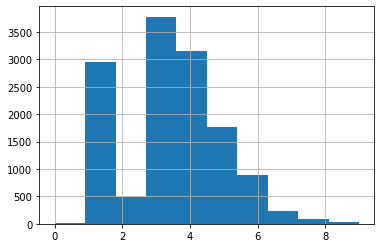

In [106]:
df2.Q24.hist() # lets have a look at the distribution

In [107]:
df2.Q25.isnull().sum()

0

In [108]:
df2.reset_index(drop=True,inplace=True)

In [109]:
df2.Q25.value_counts(dropna=False)

< 1 year                                                                 4188
1-2 years                                                                3570
2-3 years                                                                1656
I have never studied machine learning but plan to learn in the future    1225
3-4 years                                                                 919
5-10 years                                                                733
4-5 years                                                                 646
10-15 years                                                               253
20+ years                                                                 124
I have never studied machine learning and I do not plan to                 58
Other                                                                      44
Name: Q25, dtype: int64

In [110]:
mapper = {'< 1 year':2,'1-2 years':3,'2-3 years':4,'3-4 years':5,'4-5 years':6,\
         'I have never studied machine learning and I do not plan to':0,'5-10 years':7,'10-15 years':8,'20+ years':9,\
          'I have never studied machine learning but plan to learn in the future':2,'Other':1} 
# used ordinal values in the asending order of experience

In [111]:
df2.Q25= df2.Q25.map(mapper) # Label encoding

In [112]:
df2.Q25.isnull().sum()

0

In [113]:
df2.Q26.value_counts(dropna=False)

Probably yes      3584
Definitely yes    3552
Maybe             2858
Probably not      2229
Definitely not    1140
NaN                 53
Name: Q26, dtype: int64

In [114]:
df2.Q26.isnull().sum()

53

In [115]:
df2[df2.Q26.isnull()]

,Time,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q10,...,Q38_Part_12,Q38_Part_13,Q38_Part_14,Q38_Part_15,Q38_Part_17,Q38_Part_18,Q9_upper,Q9_lower,target,final_target
1799,249,Male,25-29,United States of America,Master’s degree,"A business discipline (accounting, economics, ...",Consultant,Non-profit/Service,0-1,No (we do not use ML methods),...,NaN,NaN,NaN,NaN,NaN,NaN,70000.0,60,65000,3
10708,251427,Male,30-34,China,Bachelor’s degree,Physics or astronomy,Product/Project Manager,Computers/Technology,1-2,No (we do not use ML methods),...,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,10,15000,1
10709,802,Male,18-21,China,Master’s degree,"Computer science (software engineering, etc.)",Developer Advocate,Academics/Education,0-1,We are exploring ML methods (and may one day p...,...,NaN,NaN,NaN,NaN,NaN,NaN,10000.0,0,5000,0
10713,272847,Male,18-21,India,Bachelor’s degree,"Computer science (software engineering, etc.)",Student,I am a student,0-1,"We recently started using ML methods (i.e., mo...",...,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,10,15000,1
10762,173549,Male,25-29,China,Doctoral degree,"Information technology, networking, or system ...",Data Analyst,Online Service/Internet-based Services,5-10,"We have well established ML methods (i.e., mod...",...,NaN,NaN,NaN,NaN,NaN,NaN,50000.0,40,45000,2
10763,7092,Male,25-29,China,Master’s degree,"Computer science (software engineering, etc.)",Data Engineer,Medical/Pharmaceutical,1-2,We are exploring ML methods (and may one day p...,...,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,10,15000,1
10804,224,Male,22-24,India,Bachelor’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,We are exploring ML methods (and may one day p...,...,NaN,NaN,NaN,NaN,NaN,NaN,10000.0,0,5000,0
11049,329,Male,30-34,India,Master’s degree,"Computer science (software engineering, etc.)",Data Engineer,Retail/Sales,5-10,We are exploring ML methods (and may one day p...,...,NaN,NaN,NaN,NaN,NaN,NaN,125000.0,100,112500,4
11114,1211,Male,18-21,United States of America,Bachelor’s degree,Mathematics or statistics,Student,I am a student,15-20,I do not know,...,NaN,NaN,NaN,NaN,NaN,NaN,10000.0,0,5000,0
11230,58357,Male,22-24,Thailand,Master’s degree,Mathematics or statistics,Data Scientist,Broadcasting/Communications,1-2,"We recently started using ML methods (i.e., mo...",...,NaN,NaN,NaN,NaN,NaN,NaN,10000.0,0,5000,0


In [116]:
# looking at the data. These 28 people are more likely to be a may be case
df2.Q26.fillna(value='Maybe',inplace=True)

In [117]:
mapper = {'Definitely yes':6,'Probably yes':5,'Maybe':4,'Other':3,'Probably not':2,\
         'Definitely not':1}

In [118]:
df2.Q26= df2.Q26.map(mapper)

In [119]:
df2.Q26.isnull().sum()

0

In [120]:
df2.Q26.astype('int');

In [121]:
df2.Q26= df2.Q26.astype('category',)
df2.Q26.dtype

CategoricalDtype(categories=[1, 2, 4, 5, 6], ordered=False)

# Exploratory Data Analysis

### Gender is always an interesting feature. Let's see what we got.

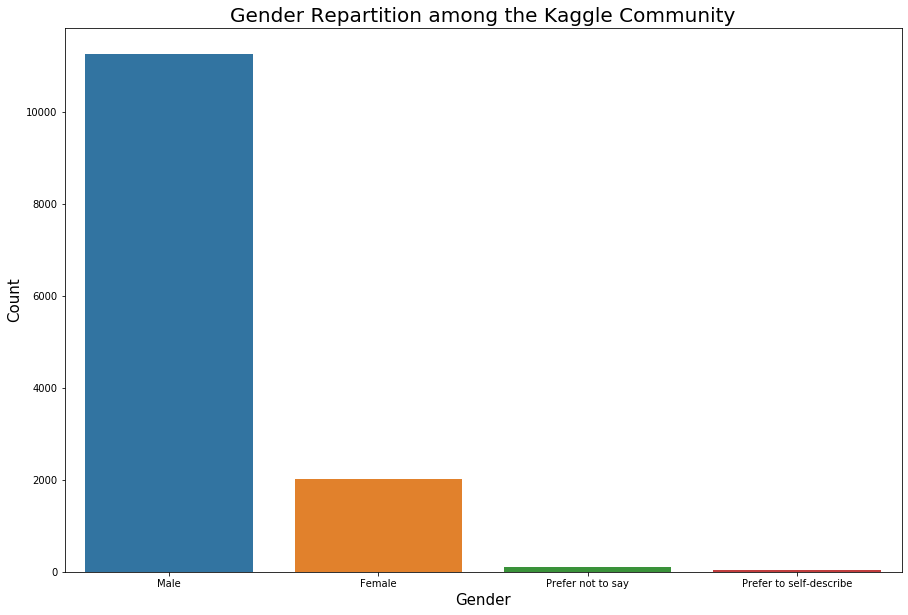

In [122]:
plt.figure(figsize=(15,10))
sns.countplot(df2['Q1'])
plt.xlabel("Gender", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Gender Repartition among the Kaggle Community", fontsize=20)
plt.show()
plt.show()

### *From the graph it is clear that the number of male participants are way more than female participants which reflects on gender diversity. Ensuring equal representation of women in the workplace can have positive effects across all the organizations.*

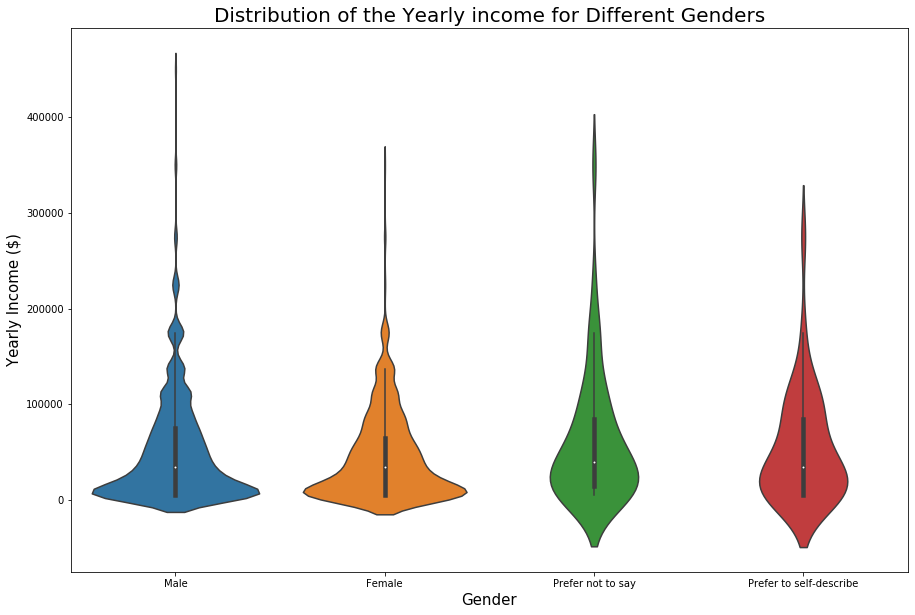

In [123]:
plt.figure(figsize=(15,10))
sns.violinplot(x='Q1', y='target', data=df2)
plt.ylabel("Yearly Income ($)", fontsize=15)
plt.xlabel("Gender", fontsize=15)
plt.title("Distribution of the Yearly income for Different Genders", fontsize=20)
plt.show()

# Exploring Age

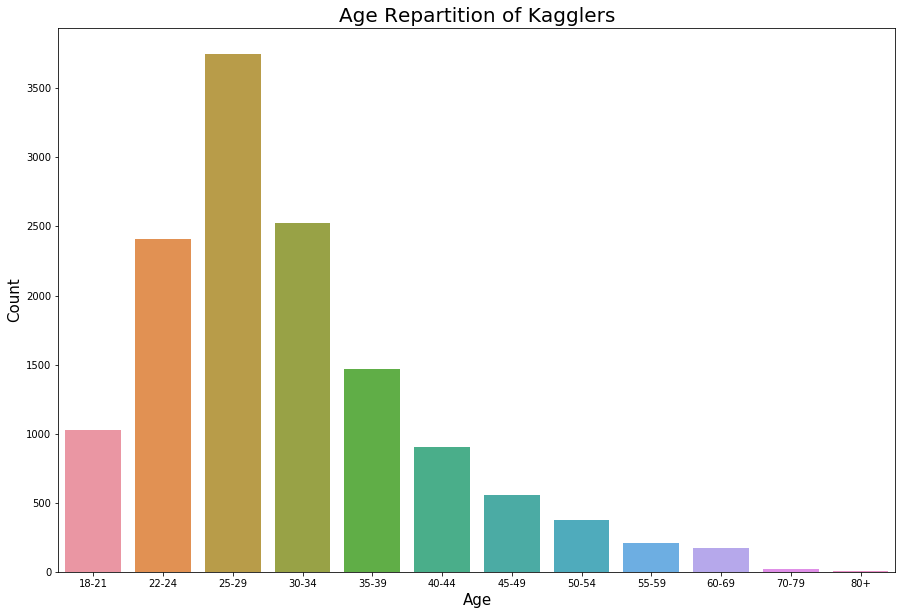

In [124]:
order = ['18-21', '22-24', '25-29', '30-34','35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70-79', '80+']
plt.figure(figsize=(15,10))
sns.countplot(df2['Q2'], order=order)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Age Repartition of Kagglers", fontsize=20)
plt.show()

### *From the age distribution it is clear that more number of participants are in between 20-40 age gap. From the below graph it is clear that the older you are, the more you earn. Until you retire. Therefore the distribution is understandable.*

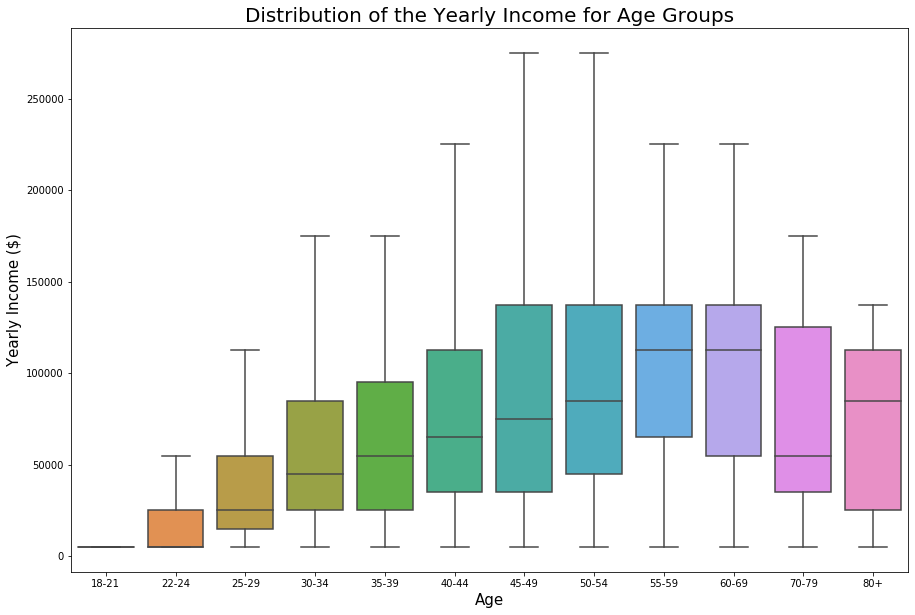

In [125]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Q2', y='target', data=df2, order=order, showfliers=False)
plt.ylabel("Yearly Income ($)", fontsize=15)
plt.xlabel("Age", fontsize=15)
plt.title("Distribution of the Yearly Income for Age Groups", fontsize=20)
plt.show()

# Exploring various countries

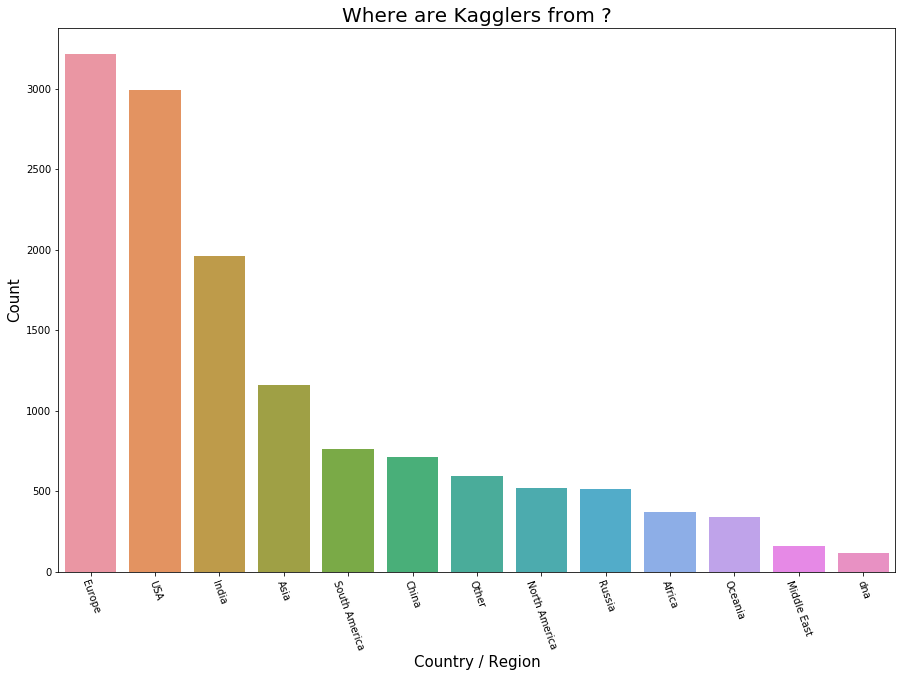

In [126]:
country_dic = {'Morocco': 'Africa', 'Tunisia': 'Africa','Austria': 'Europe','Hong Kong (S.A.R.)': 'Asia',
             'Republic of Korea': 'Asia','Thailand': 'Asia','Czech Republic': 'Europe','Philippines': 'Asia',
             'Romania': 'Europe','Kenya': 'Africa','Finland': 'Europe','Norway': 'Europe','Peru': 'South America',
             'Iran, Islamic Republic of...': 'Middle East', 'Bangladesh': 'Asia','New Zealand': 'Oceania',
             'Egypt': 'Africa','Chile': 'South America','Belarus': 'Europe','Hungary': 'Europe','Ireland': 'Europe',
             'Belgium': 'Europe','Malaysia': 'Asia','Denmark': 'Europe','Greece': 'Europe', 'Pakistan': 'Asia',
             'Viet Nam': 'Asia','Argentina': 'South America','Colombia': 'South America','Indonesia': 'Oceania',
             'Portugal': 'Europe','South Africa': 'Africa','South Korea': 'Asia','Switzerland': 'Europe',
             'Sweden': 'Europe','Israel': 'Middle East','Nigeria': 'Africa','Singapore': 'Asia','I do not wish to disclose my location': 'dna',
             'Mexico': 'North America','Ukraine': 'Europe','Netherlands': 'Europe','Turkey': 'Asia','Poland': 'Europe',
             'Australia': 'Oceania','Italy': 'Europe','Spain': 'Europe','Japan': 'Asia','France': 'Europe',
             'Canada': 'North America', 'United Kingdom of Great Britain and Northern Ireland': 'Europe',
             'Germany': 'Europe','Brazil': 'South America','Russia': 'Russia','Other': 'Other','China': 'China',
             'India': 'India','United States of America': 'USA'}
df2['Q3'] = df2['Q3'].apply(lambda x: country_dic[x])
plt.figure(figsize=(15,10))
sns.countplot(df2['Q3'], order=df2['Q3'].value_counts().index)
plt.xticks(rotation=-70)
plt.xlabel("Country / Region", fontsize=15)
plt.ylabel("Count", fontsize=15)
***plt.title("Where are Kagglers from ?", fontsize=20)
plt.show()

### *1. Salaries highly vary depending on the country you work in. I regrouped most country by continent / region, except for the five most represented ones (USA, India, China, Russia and Brazil)*
### *2. As expected, North American, Oceanian and Middle East Kagglers earn a bit more.Mostly because the economical system permits high wages.*
### *3. The wage gap is visible here, and appears to be higher in Europe and in North America than in Asia.* 

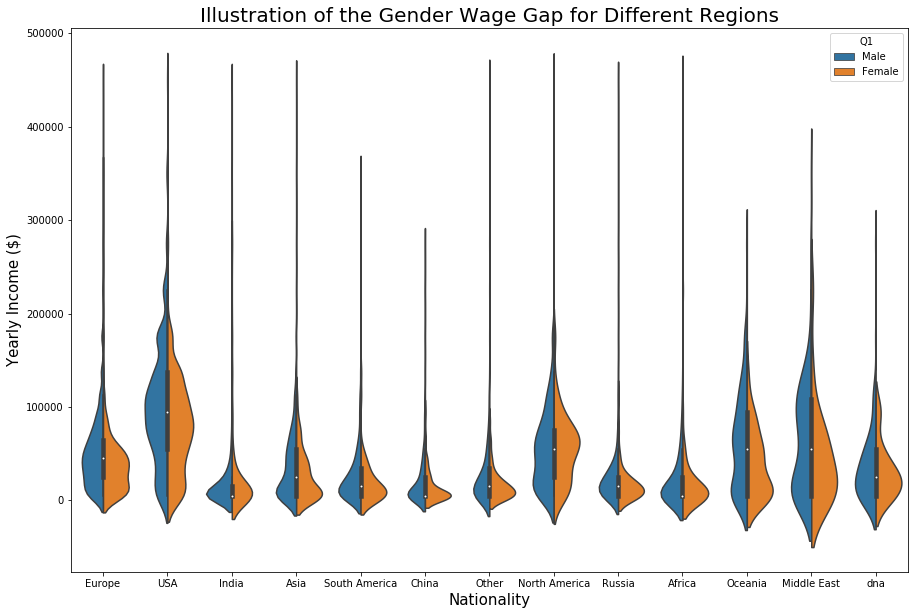

In [127]:
df = df2[df2['Q1'] != "Prefer not to say"]
df = df[df['Q1'] != "Prefer to self-describe"]

plt.figure(figsize=(15,10))
sns.violinplot(x='Q3', y='target', hue='Q1', data=df, split=True, order=df2['Q3'].value_counts().index)
plt.ylabel("Yearly Income ($)", fontsize=15)
plt.xlabel("Nationality", fontsize=15)
plt.title("Illustration of the Gender Wage Gap for Different Regions", fontsize=20)
plt.show()

# Exploring experiences and their effect on salaries

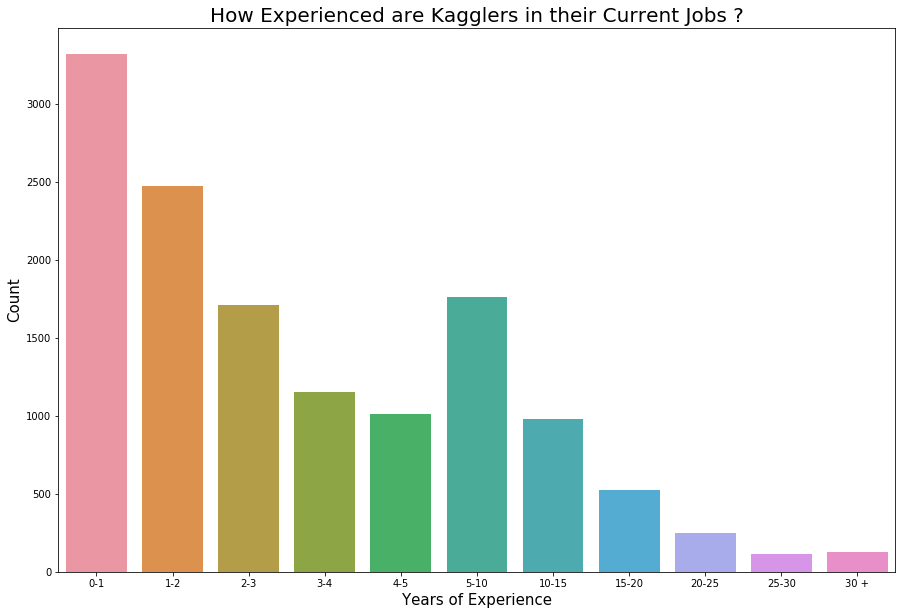

In [128]:
order = ['0-1', '1-2', '2-3',  '3-4', '4-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30 +']

plt.figure(figsize=(15,10))
sns.countplot(df2['Q8'], order=order)
plt.xlabel("Years of Experience", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("How Experienced are Kagglers in their Current Jobs ?", fontsize=20)
plt.show()

### *Once again, logical results. The salary is a strictly increasing function ofthe experience in the job.*

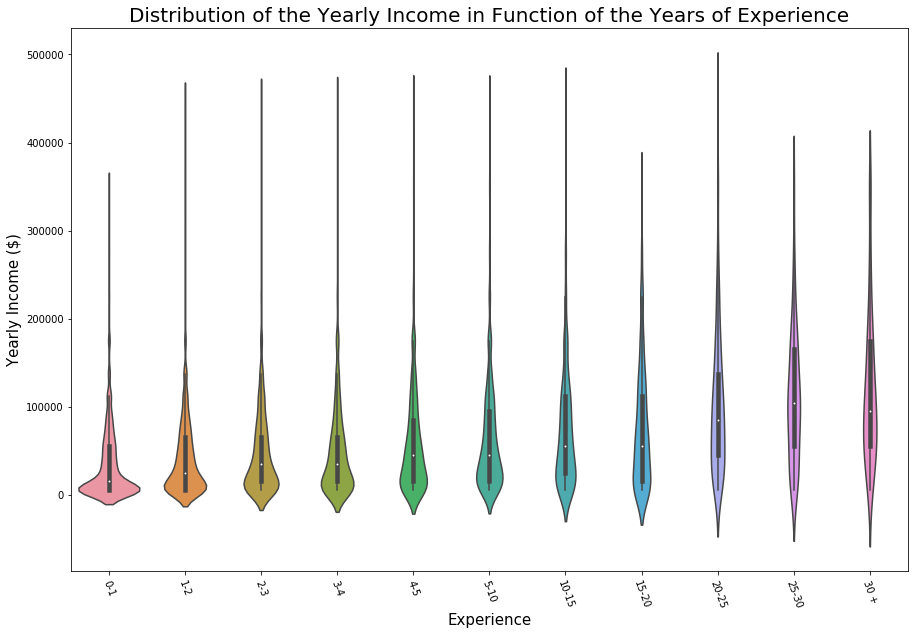

In [129]:
plt.figure(figsize=(15,10))
sns.violinplot(x='Q8', y='target', data=df2, order=order)
plt.xticks(rotation=-70)
plt.ylabel("Yearly Income ($)", fontsize=15)
plt.xlabel("Experience", fontsize=15)
plt.title("Distribution of the Yearly Income in Function of the Years of Experience", fontsize=20)
plt.show()

# Exploring industries and their salary effect

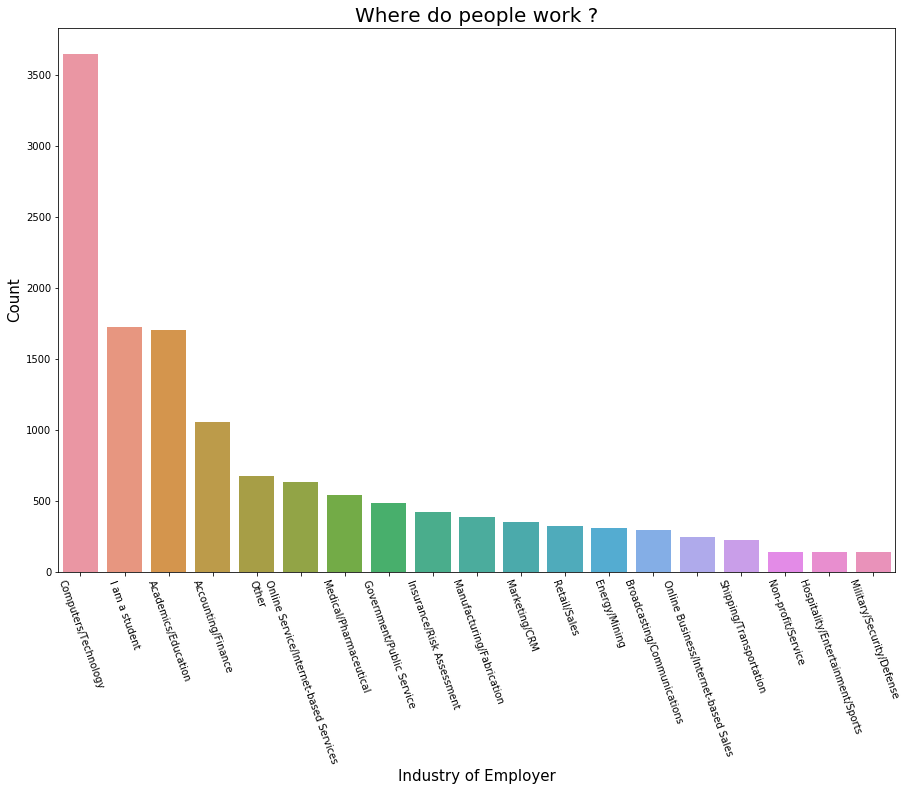

In [130]:
plt.figure(figsize=(15,10))
sns.countplot(df2['Q7'], order=df2['Q7'].value_counts().index)
plt.xticks(rotation=-70)
plt.xlabel("Industry of Employer", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Where do people work ?", fontsize=20)
plt.show()

### *The three categories that stand out are students (again, well they're not paid), Non-profit/Services and Academics/Education. Nothing incoherent, as those last two are paid by the state. I was expecting more contrasted results, but a model can definitely learn something from this.*

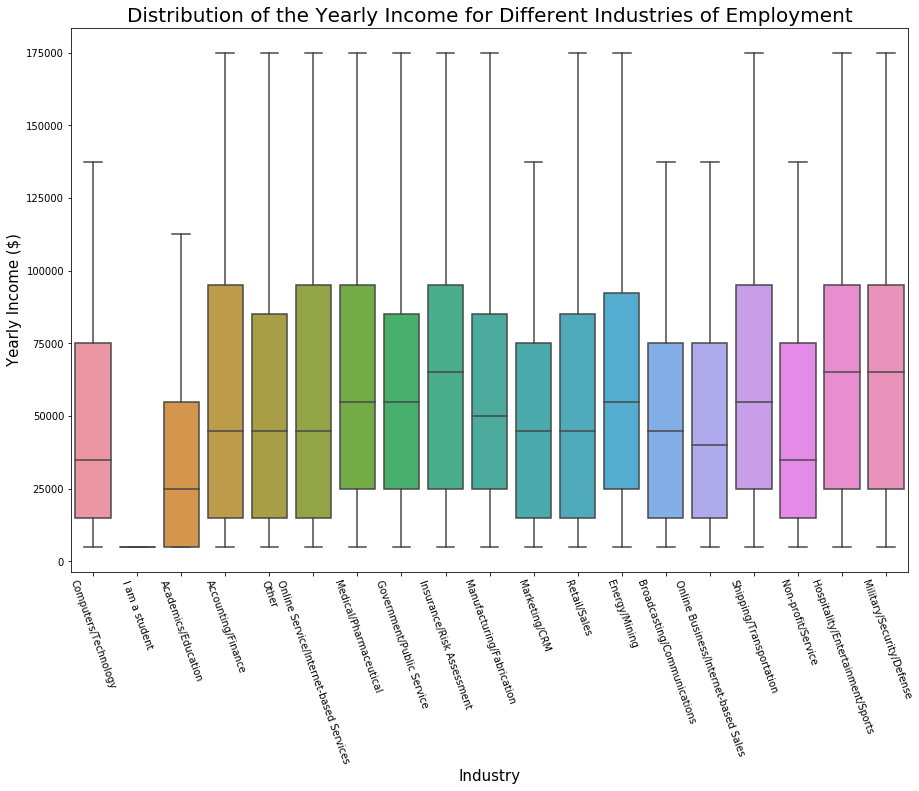

In [131]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Q7', y='target', data=df2, order=df2['Q7'].value_counts().index, showfliers=False)
plt.xticks(rotation=-70)
plt.ylabel("Yearly Income ($)", fontsize=15)
plt.xlabel("Industry", fontsize=15)
plt.title("Distribution of the Yearly Income for Different Industries of Employment", fontsize=20)
plt.show()

# Feature Selection and Feature Importance
Feature Selection is a very critical component in the workflow. When presented data with very high dimensionality, models usually choke because
    
**1.Training time increases exponentially with number of features.**

**2.Models have increasing risk of overfitting with increasing number of features.**
- Feature Selection methods helps with these problems by *reducing the dimensions without much loss of the total information.* It also helps to make sense of the features and its importance.
- Feature selection acts as a technique to pick the *most efficient variables* that can be used to predtict the target. 
- This will eventually help in a *lean and efficient model* that can be deployed in production efficiently. Further, accurate feature set corresponds to the best bias-variance tradeoff point for the learning algorithm.

I will start off with a selected set of features that I had cleaned earlier

In [132]:
df2.columns

Index(['Time', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q10',
       ...
       'Q38_Part_12', 'Q38_Part_13', 'Q38_Part_14', 'Q38_Part_15',
       'Q38_Part_17', 'Q38_Part_18', 'Q9_upper', 'Q9_lower', 'target',
       'final_target'],
      dtype='object', length=160)

In [133]:
df2.final_target.value_counts()

0    3571
1    2904
3    2131
2    1868
4    1747
5    1195
Name: final_target, dtype: int64

In [134]:
dataset= df2[['final_target','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q10','Q12_MULTIPLE_CHOICE','Q17','Q18','Q20','Q22','Q23','Q24','Q25','Q26']]
dataset.dtypes.value_counts()

object      14
int64        4
category     1
dtype: int64

In [135]:
dataset.shape

(13416, 19)

In [136]:
dataset.head()

,final_target,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q10,Q12_MULTIPLE_CHOICE,Q17,Q18,Q20,Q22,Q23,Q24,Q25,Q26
0,1,Male,30-34,Oceania,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,No (we do not use ML methods),"Basic statistical software (Microsoft Excel, G...",Python,Python,Scikit-Learn,Matplotlib,1,2,2,1
1,0,Female,30-34,USA,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,I do not know,Local or hosted development environments (RStu...,Java,Python,Scikit-Learn,ggplot2,4,5,2,6
2,0,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,I do not know,"Advanced statistical software (SPSS, SAS, etc.)",SQL,R,Scikit-Learn,Matplotlib,4,5,4,4
3,1,Male,35-39,South America,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,No (we do not use ML methods),"Basic statistical software (Microsoft Excel, G...",Python,R,Scikit-Learn,Matplotlib,2,1,2,2
4,0,Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,"We recently started using ML methods (i.e., mo...",Local or hosted development environments (RStu...,Python,Python,Keras,Matplotlib,4,1,2,2


In [137]:
# dataset = dataset[dataset.Q7.isin(['Computers/Technology','Academics/Education','Accounting/Finance'])]

**Renaming all the required columns into meaningfull names for understanding**

In [138]:
dataset_clean = pd.DataFrame()

dataset_clean['target_salary'] = dataset['final_target']

dataset_clean['Gender'] = dataset['Q1']
dataset_clean['Age'] = dataset['Q2']
dataset_clean['Country'] = dataset['Q3']
dataset_clean['Degree'] = dataset['Q4']
dataset_clean['Major'] = dataset['Q5']
dataset_clean['JobTitle'] = dataset['Q6']
dataset_clean['employer_industry'] = dataset['Q7']
dataset_clean['Experience'] = dataset['Q8']
dataset_clean['employer_mlmodels'] = dataset['Q10']
dataset_clean['DataAnalysisToolat_work'] = dataset['Q12_MULTIPLE_CHOICE']
dataset_clean['Most_used_programming_language'] = dataset['Q17']
dataset_clean['Recommended_language'] = dataset['Q18']
dataset_clean['ml_lib'] = dataset['Q20']
dataset_clean['visualization'] = dataset['Q22']
dataset_clean['coding_time'] = dataset['Q23']
dataset_clean['code_analyze_time'] = dataset['Q24']
dataset_clean['ml_experience'] = dataset['Q25']
dataset_clean['data_scientist_ornot'] = dataset['Q26']


dataset_clean = dataset_clean.reset_index(drop = True)

dataset_clean.head()

,target_salary,Gender,Age,Country,Degree,Major,JobTitle,employer_industry,Experience,employer_mlmodels,DataAnalysisToolat_work,Most_used_programming_language,Recommended_language,ml_lib,visualization,coding_time,code_analyze_time,ml_experience,data_scientist_ornot
0,1,Male,30-34,Oceania,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,No (we do not use ML methods),"Basic statistical software (Microsoft Excel, G...",Python,Python,Scikit-Learn,Matplotlib,1,2,2,1
1,0,Female,30-34,USA,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,I do not know,Local or hosted development environments (RStu...,Java,Python,Scikit-Learn,ggplot2,4,5,2,6
2,0,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,I do not know,"Advanced statistical software (SPSS, SAS, etc.)",SQL,R,Scikit-Learn,Matplotlib,4,5,4,4
3,1,Male,35-39,South America,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,No (we do not use ML methods),"Basic statistical software (Microsoft Excel, G...",Python,R,Scikit-Learn,Matplotlib,2,1,2,2
4,0,Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,"We recently started using ML methods (i.e., mo...",Local or hosted development environments (RStu...,Python,Python,Keras,Matplotlib,4,1,2,2


In [139]:
y = dataset_clean.pop('target_salary'); # separate the target variable
y.value_counts()

0    3571
1    2904
3    2131
2    1868
4    1747
5    1195
Name: target_salary, dtype: int64

# Defining a function to find the unbiased fit estimator Adjusted 𝑅2

In [140]:
def adjusted_r2(y_true,y_pred,data):
    r2 = r2_score(y_true,y_pred)
    return(1 - (1-r2)*(data.shape[0]-1)/(data.shape[0]-data.shape[1]-1))

In [141]:
# # change the features to categorical 
# dataset_clean.coding_time       = dataset_clean.coding_time.astype('category')
# dataset_clean.code_analyze_time = dataset_clean.code_analyze_time.astype('category')
# dataset_clean.ml_experience     = dataset_clean.ml_experience.astype('category')

* **One hot encoding** to ensure that the columns with multiple categories are separated in 
different columns. I am using pandas get_dummies function to encode the dataframe 
(will encode only object or categorical type columns). While doing so , to ensure that 
we get rid of the dummy variable trap, drop_first parameter needs to be set as True.
This step will produce k-l features from a column with k categories.

In [142]:
dataset_clean.dtypes.value_counts()

object      14
int64        3
category     1
dtype: int64

In [143]:
dataset_clean.loc[:,dataset_clean.dtypes.values == "object"].head() # checking the columns with int data type

,Gender,Age,Country,Degree,Major,JobTitle,employer_industry,Experience,employer_mlmodels,DataAnalysisToolat_work,Most_used_programming_language,Recommended_language,ml_lib,visualization
0,Male,30-34,Oceania,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,No (we do not use ML methods),"Basic statistical software (Microsoft Excel, G...",Python,Python,Scikit-Learn,Matplotlib
1,Female,30-34,USA,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,I do not know,Local or hosted development environments (RStu...,Java,Python,Scikit-Learn,ggplot2
2,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,I do not know,"Advanced statistical software (SPSS, SAS, etc.)",SQL,R,Scikit-Learn,Matplotlib
3,Male,35-39,South America,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,No (we do not use ML methods),"Basic statistical software (Microsoft Excel, G...",Python,R,Scikit-Learn,Matplotlib
4,Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,"We recently started using ML methods (i.e., mo...",Local or hosted development environments (RStu...,Python,Python,Keras,Matplotlib


In [144]:
dataset_clean_int = dataset_clean.loc[:,dataset_clean.dtypes.values == "int64"]# checking the columns with int data type

In [145]:
dataset_clean.dtypes.value_counts()

object      14
int64        3
category     1
dtype: int64

# One hot encoding
### *1. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.*
### *2. When a one hot encoding is used for the output variable, it may offer a more nuanced set of predictions than a single label.*



In [146]:
dataset_clean_dummy = pd.get_dummies(dataset_clean.loc[:,dataset_clean.dtypes.values == "object"],drop_first=True)

In [147]:
dataset_clean = pd.concat([dataset_clean_dummy, dataset_clean_int], axis=1)

In [149]:
dataset_clean.shape # looks like get_dummies did its work!!

(13416, 163)

In [150]:
len(dataset_clean.columns)

163

In [151]:
dataset_clean.head() # nice and easy 

,Gender_Male,Gender_Prefer not to say,Gender_Prefer to self-describe,Age_22-24,Age_25-29,Age_30-34,Age_35-39,Age_40-44,Age_45-49,Age_50-54,...,visualization_Leaflet,visualization_Matplotlib,visualization_Other,visualization_Plotly,visualization_Seaborn,visualization_Shiny,visualization_ggplot2,coding_time,code_analyze_time,ml_experience
0,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,2,2
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,4,5,2
2,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,4,5,4
3,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,2,1,2
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,4,1,2


### We have 163 features now . lets see how many can be removed. 
### I would like to check Random Forest regressor

In [152]:
# Train test spliting with test set of 20%
X_train, X_test, y_train , y_test = train_test_split(dataset_clean,y, test_size=0.3, random_state=9)

In [153]:
X_train.shape

(9391, 163)

### *Using Random forest we can check out feature importance.*
### *This method is based on the Information gain while splitting on important features*

In [154]:
forest = RandomForestRegressor()

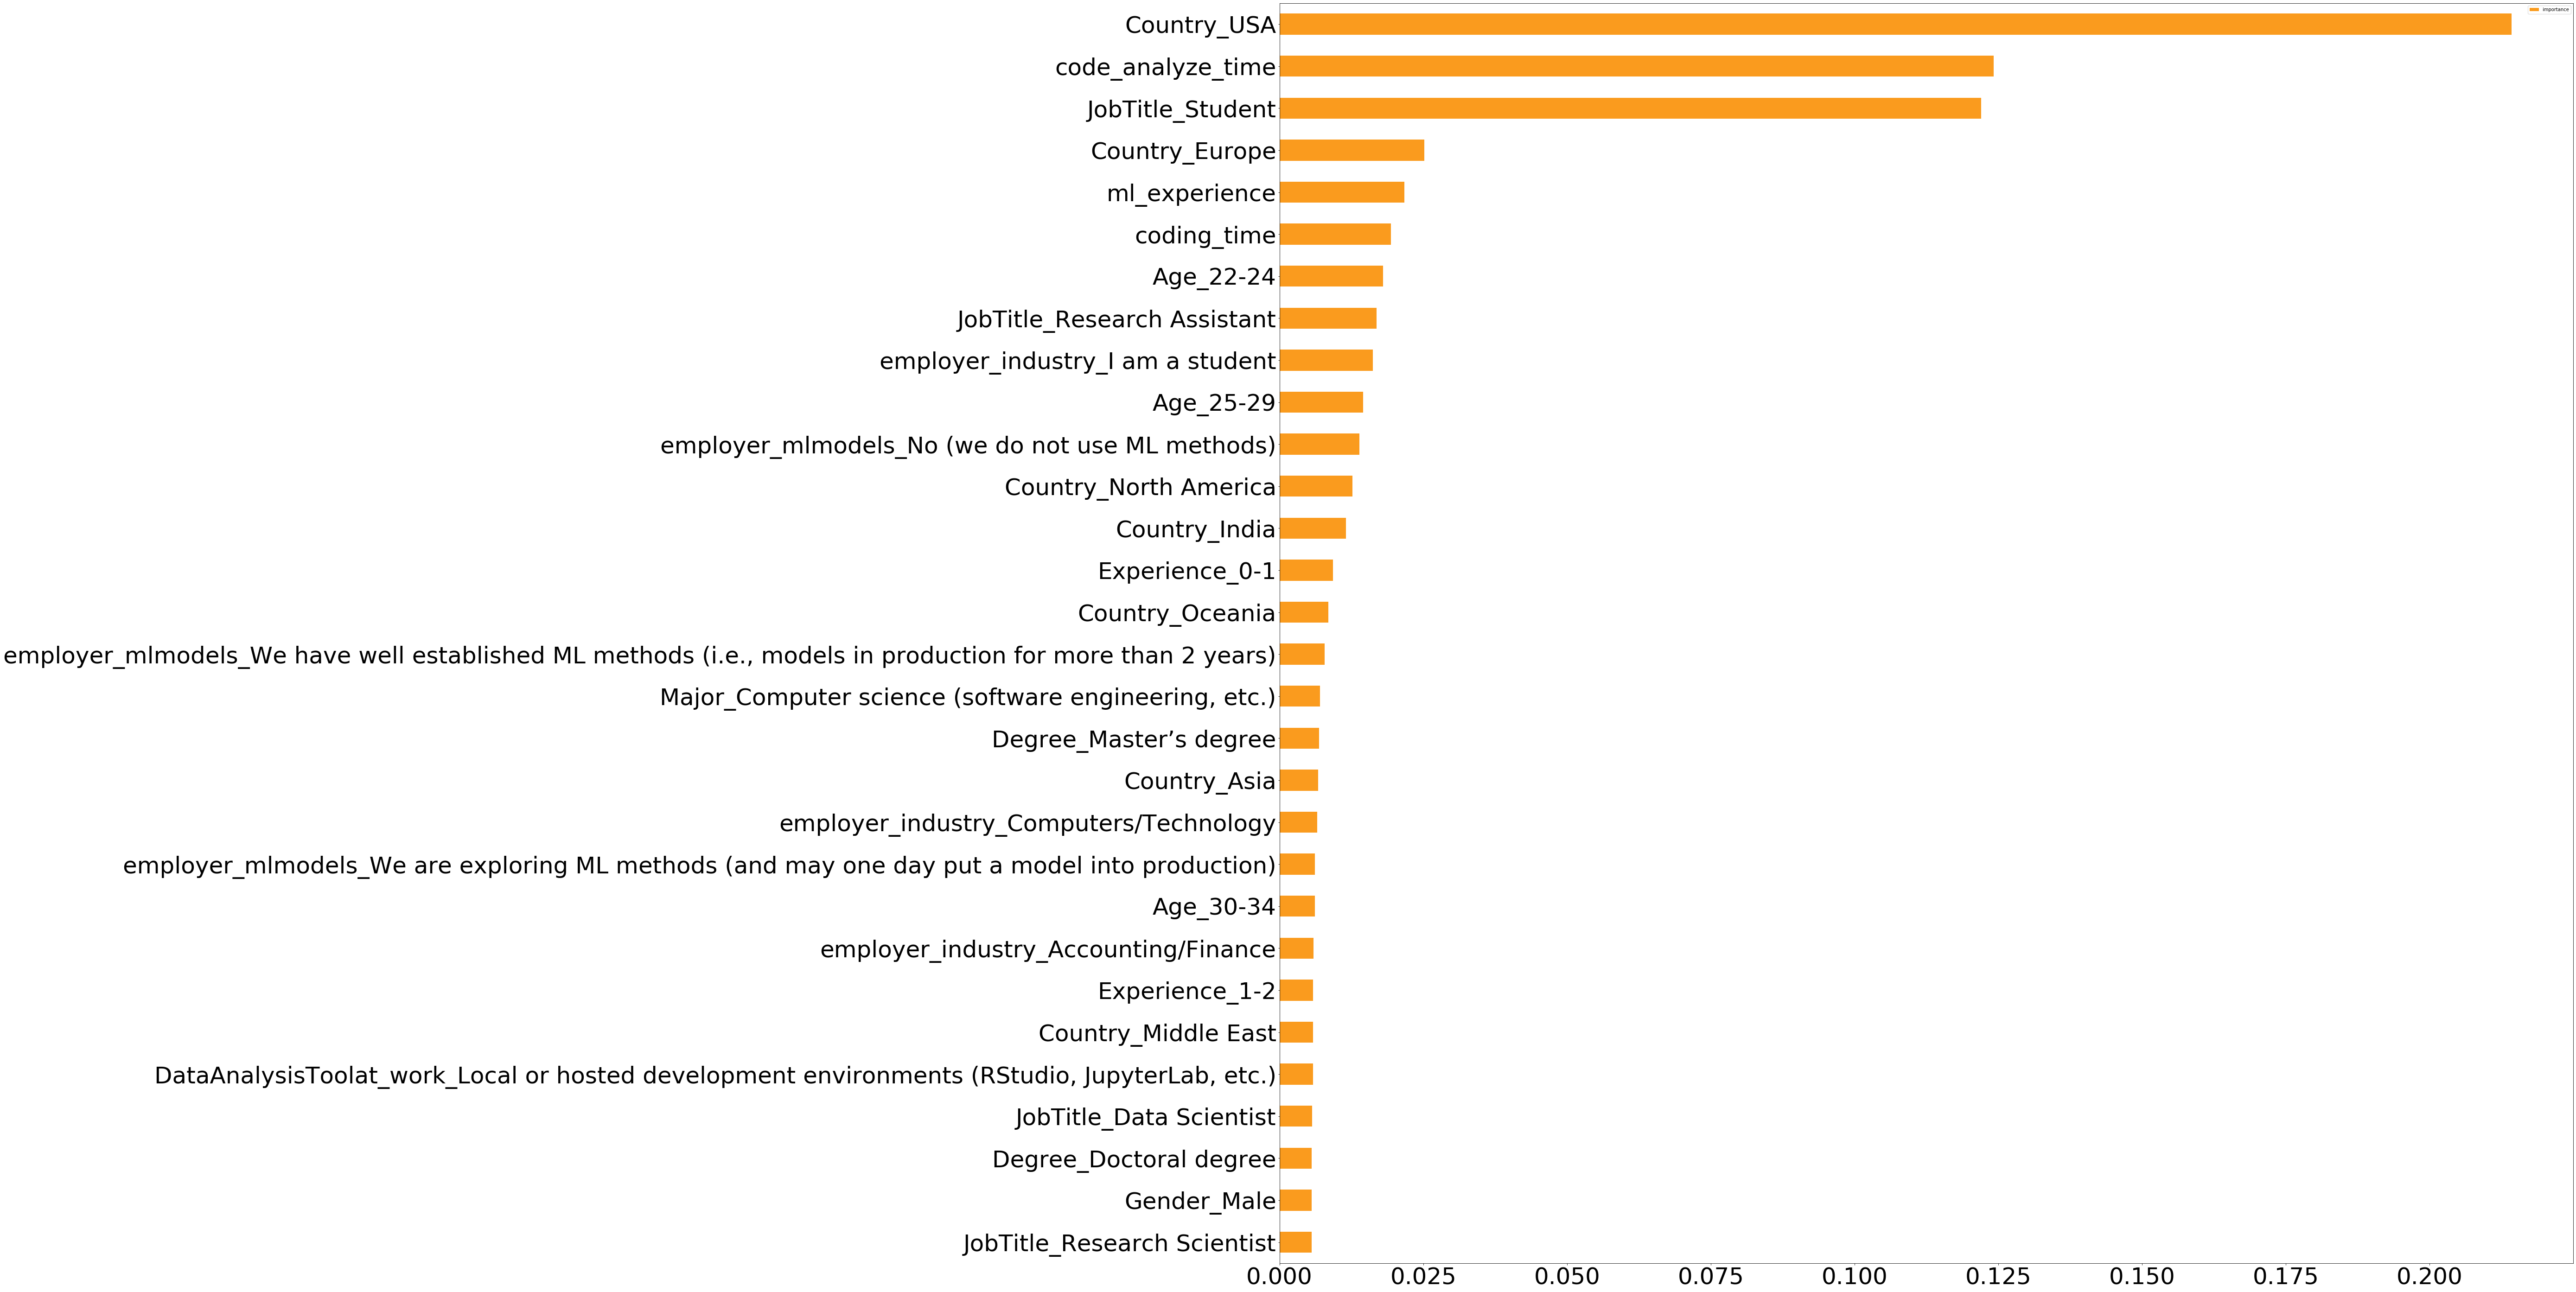

In [155]:
forest.fit(dataset_clean.values,y)
feature_importance = pd.DataFrame(forest.feature_importances_, index=dataset_clean.columns,\
                                 columns=['importance']).sort_values('importance', ascending=False)
ax=feature_importance.head(30).plot(kind='barh', figsize=(50,50), fontsize=50, y='importance', \
                                     color='#fa9b1e')
ax.invert_yaxis()

# Discussion on Feature Importance

#### *Looking at the feature importances from Random forest regression, we can see that the country where data enthusiast is from, takes up a very high position in the top feature. This correlation is visible from the correlation plot as well. USA dominates the feature importance results along with 'Coding time' and Age' .These makes intuitive sense and we can see that most of the important features are more or less the same*

### *Important original attributes are:*

**1.Country**

**2.Code analyze time, ML methods experience, ML libraries**

**3.Age**

**4.Industry of work**

**5.Use of Visualisations like Matplotlib and Seaborn**

# Using PCA to select the features that matters.

### *Feature engineering is the process of using knowledge of the data to create features that make machine learning algorithms work and produce better outputs. If feature engineering is done correctly, it increases the predictive power of machine learning algorithms by creating features from raw data that help facilitate the machine learning process.*

* **Principal Component Analysis** is used to extract the important information from
a multivariate data table and to express this information as a set of new variables 
called principal components.*

 1. When the **n_components =75 (Reducing the features to 75)**the accuracy was around 57% for both test and train
 
2. When the **n_components was changed to 99% of variance the features was taken as 126** for which the accuracy was around 60% for both test and train

In [156]:
model_lr = linear_model.LinearRegression()

#99% of variance

pca = PCA(n_components=.99)
pca.fit(dataset_clean.values)
principalcomponents = pca.transform(dataset_clean.values)
principalcomponents_test = pca.transform(X_test)
model_lr_pca = linear_model.LinearRegression()
model_lr_pca.fit(principalcomponents,y)

predictions_pca_train = model_lr_pca.predict(principalcomponents)
predictions_pca_test = model_lr_pca.predict(principalcomponents_test)

print ("Train r2 Score")

print (r2_score(y, predictions_pca_train))  

print ("Test r2 Score")

print (r2_score(y_test,predictions_pca_test))

Train r2 Score
0.6093979186068736
Test r2 Score
0.6118699351936807


In [157]:
df_pca = pd.DataFrame(data = principalcomponents)

In [158]:
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,-2.117200,1.550794,-0.132441,-0.551233,0.452051,-0.167351,-0.902177,-0.450670,0.145925,-0.309244,...,-0.014741,-0.010586,-0.026353,-0.005307,-0.031784,0.023342,0.012303,0.039173,0.001532,-0.005718
1,0.357750,-1.427226,2.301778,0.635247,-0.506157,0.336284,0.000570,0.776045,-0.856471,-0.624920,...,0.039140,0.074189,-0.012788,-0.021796,0.018116,0.051547,0.016125,-0.005120,0.021561,-0.028615
2,1.545322,-1.183601,1.064312,0.557898,0.499559,0.434270,-0.422163,1.781225,-0.230146,0.224164,...,0.029558,0.085815,0.007431,-0.221954,0.069559,0.076425,-0.010621,-0.026511,-0.000783,0.036923
3,-2.633633,0.558926,-0.605983,0.101951,0.993679,0.449312,-1.016320,-0.529014,0.077900,0.222710,...,-0.011775,-0.003846,-0.011007,0.011195,-0.013840,0.026785,-0.032462,0.035666,0.005073,0.007532
4,-2.440501,-1.893497,-0.630558,0.056033,-0.738981,-0.126466,0.025369,0.084404,0.385768,-0.400487,...,-0.002558,-0.028808,-0.007778,-0.008658,0.002314,-0.007510,-0.021228,-0.005165,-0.066260,0.019532


# Model Implementation
### Logistic Regression

*Implemented both kfold and Stratified Kfold (Stratification is the process of rearranging the 
data so as to ensure that each fold is a good representative of the whole) both gave 50% as 
the accuracy*


In [247]:
from sklearn.metrics import accuracy_score, log_loss, precision_score

X= df_pca   #getting the final dataframe 
kfold = KFold(n_splits=10)   #defining the 10 folds
kfold.get_n_splits(X)

accuracy = np.zeros(10)
precision = np.zeros(10)
error_test = np.zeros(10)
error_train = np.zeros(10)
np_idx = 0

# iterating through each fold
for train_idx, test_idx in kfold.split(X):
    xtrain, xtest = X.values[train_idx], X.values[test_idx]   #getting the train and test data based on indices
    ytrain, ytest = y.values[train_idx], y.values[test_idx]
    sc_x = StandardScaler() 
    xtrain = sc_x.fit_transform(xtrain)  
    xtest = sc_x.transform(xtest)
    classifier = LogisticRegression(random_state = 0) 
    classifier.fit(xtrain, ytrain)
    y_test_pred = classifier.predict(xtest)
    y_train_pred = classifier.predict(xtrain)
    predtest = classifier.predict_proba(xtest)
    predtrain = classifier.predict_proba(xtrain)
    ERR_train = log_loss(ytrain,predtrain )
    ERR_test = log_loss(ytest, predtest)
    ACC = accuracy_score(ytest, y_test_pred)
    PRC = precision_score(ytest , y_test_pred, average ='macro')
    # calculating the accuracy,precision and error on the dataset for each folds
    accuracy[np_idx] = ACC*100
    precision[np_idx] = PRC*100
    error_test[np_idx] = ERR_test
    error_train[np_idx] = ERR_train
    np_idx += 1
    print ("Fold {}: Accuracy: {}%  Precision: {}%  Error: {}".format(np_idx,\
                                    round(ACC*100,3), round(PRC*100,3), round(ERR_test,3)))   

#finding the means of accuracy, precision and test_error
print ("Average Accuracy: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))
print ("Average Precision: {}%({}%)".format(round(np.mean(precision),3),round(np.std(precision),3)))
print ("Average Error: {}%({}%)".format(round(np.mean(error_test),3),round(np.std(error_test),3)))

Fold 1: Accuracy: 54.545%  Precision: 43.455%  Error: 1.144
Fold 2: Accuracy: 46.125%  Precision: 44.426%  Error: 1.301
Fold 3: Accuracy: 45.976%  Precision: 44.162%  Error: 1.311
Fold 4: Accuracy: 42.697%  Precision: 42.305%  Error: 1.325
Fold 5: Accuracy: 54.471%  Precision: 45.952%  Error: 1.178
Fold 6: Accuracy: 47.466%  Precision: 44.669%  Error: 1.297
Fold 7: Accuracy: 41.462%  Precision: 39.073%  Error: 1.366
Fold 8: Accuracy: 47.054%  Precision: 44.358%  Error: 1.297
Fold 9: Accuracy: 48.62%  Precision: 44.046%  Error: 1.278
Fold 10: Accuracy: 45.936%  Precision: 36.744%  Error: 1.279
Average Accuracy: 47.435%(4.072%)
Average Precision: 42.919%(2.702%)
Average Error: 1.278%(0.064%)


In [256]:

model_lr = linear_model.LogisticRegression(multi_class='ovr')
X_train, X_test, y_train, y_test = train_test_split(df_pca,y, test_size = 0.3, random_state = 9)
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(X_train)  
xtest = sc_x.transform(X_test)
model_lr.fit(X_train, y_train)
    
predictions = model_lr.predict(X_test)

y_test_pred = model_lr.predict(X_test)
y_train_pred = model_lr.predict(X_train)
predtest = model_lr.predict_proba(X_test)
predtrain = model_lr.predict_proba(X_train)

#finding the accuracy, precision and test_error
accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_test = precision_score(y_test , y_test_pred, average ='macro')
precision_train = precision_score(y_train , y_train_pred, average ='macro')

print("Accuracy_test: {}%".format(round(np.mean(accuracy_test),3)))
print("Accuracy_train: {}%".format(round(np.mean(accuracy_train),3))) 
print("precision_test: {}%".format(round(np.mean(precision_test),3)))
print("precision_train: {}%".format(round(np.mean(precision_train),3)))    

Accuracy_test: 0.474%
Accuracy_train: 0.512%
precision_test: 0.43%
precision_train: 0.485%


# Learning curve

*Learning curves are plots that show changes in learning performance over time in terms of experience.
Learning curves of model performance on the train and validation datasets can be used to diagnose an underfit, overfit, or well-fit model.*

* Underfitting occurs when the model is not able to obtain a sufficiently low error value on the training set.

* Fitting a more flexible model requires estimating a greater number of parameters. These more complex models can lead to a phenomenon known as overfitting the data, which essentially means they follow the errors, or noise, too closely.
* The plot of training loss decreases to a point of stability.
* The plot of validation loss decreases to a point of stability and has a small gap with the training loss.

In [162]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt

<module 'matplotlib.pyplot' from 'c:\\users\\harik\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\matplotlib\\pyplot.py'>

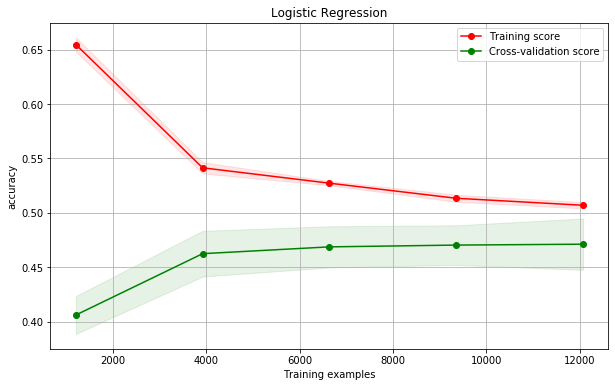

In [163]:
model_lr = LogisticRegression()
plot_learning_curve(model_lr,'Logistic Regression', df_pca , y, cv=10)

# Hyperparameter Tuning
*Grid search is a traditional way to perform hyperparameter optimization. It works by searching exhaustively through a specified subset of hyperparameters.
The benefit of grid search is that it is guaranteed to find the optimal combination of parameters supplied. The drawback is that it can be very time consuming and computationally expensive.
Hyper-parameter tuning might not be critical for most use cases but can significantly affect the efficiency of your processes and the quality of the results you are trying to obtain*

In [164]:
from sklearn.model_selection import GridSearchCV

### commenting the code below as it takes around 2hours to execute

In [210]:
# import time
# penalty = ['l1', 'l2']
# C = [0.05, 0.1, 0.5, 1, 5, 10, 50, 100,500]
# class_weight = [{1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
# solver = ['liblinear', 'saga']
# param_grid = dict(penalty=penalty,
#                   C=C,
#                   class_weight=class_weight,
#                   solver=solver)
# grid = GridSearchCV(estimator=model_lr,
#                     param_grid=param_grid,
#                     cv=10,
#                     verbose=1,
#                     n_jobs=-1,
#                     scoring= 'accuracy',
#                     return_train_score=True                
#                    )
# start_time = time.time()
# grid_result = grid.fit(df_pca.values, y)

Fitting 10 folds for each of 176 candidates, totalling 1760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 1760 out of 1760 | elapsed: 109.4min finished


In [211]:
# grid_results_log= pd.DataFrame(grid_result.cv_results_) # convert to DF

In [212]:
# grid_results_log.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_penalty,param_solver,params,split0_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,1.356189,0.242133,0.004797,0.006873,0.01,"{1: 0.5, 0: 0.5}",l1,liblinear,"{'C': 0.01, 'class_weight': {1: 0.5, 0: 0.5}, ...",0.416357,...,0.399238,0.393606,0.390840,0.396605,0.397019,0.395330,0.396290,0.399106,0.395556,0.002517
1,6.180850,1.175021,0.002400,0.001959,0.01,"{1: 0.5, 0: 0.5}",l1,saga,"{'C': 0.01, 'class_weight': {1: 0.5, 0: 0.5}, ...",0.408178,...,0.392032,0.391535,0.385870,0.392215,0.393706,0.389947,0.393972,0.392316,0.390967,0.002377
2,6.709466,0.555874,0.001998,0.001998,0.01,"{1: 0.5, 0: 0.5}",l2,liblinear,"{'C': 0.01, 'class_weight': {1: 0.5, 0: 0.5}, ...",0.476580,...,0.471797,0.473702,0.468196,0.468986,0.472298,0.471017,0.470067,0.473628,0.470723,0.001977
3,5.305720,0.875225,0.004393,0.002798,0.01,"{1: 0.5, 0: 0.5}",l2,saga,"{'C': 0.01, 'class_weight': {1: 0.5, 0: 0.5}, ...",0.470632,...,0.465005,0.466330,0.459168,0.463437,0.463188,0.463067,0.462698,0.463691,0.462632,0.002412
4,0.837681,0.093548,0.002796,0.001830,0.01,"{1: 0.4, 0: 0.6}",l1,liblinear,"{'C': 0.01, 'class_weight': {1: 0.4, 0: 0.6}, ...",0.419331,...,0.402385,0.397167,0.394236,0.399752,0.400000,0.399553,0.401010,0.401341,0.398761,0.002570


In [213]:
# grid_results_log.columns  #printing all the column names

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_class_weight', 'param_penalty', 'param_solver',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'split5_train_score', 'split6_train_score', 'split7_train_score',
       'split8_train_score', 'split9_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [214]:
# print('best estimator is ', grid.best_estimator_) #print the best estimator 
# print("Best score after Grid search " ,round(grid.best_score_,2))  #print the best score
# # print("mean Variance after Grid search " ,round(grid.cv_results_['std_test_score'].mean()*100,2),'%')

best estimator is  LogisticRegression(C=0.5, class_weight={0: 0.4, 1: 0.6}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Best score after Grid search  0.47
mean Variance after Grid search  2.28 %


In [215]:
# grid_results= pd.DataFrame(grid.cv_results_) #storing the results in a dataframe to plot the graphs
# grid_results.index=grid_results.param_C

### **Bias Error**
*Bias are the simplifying assumptions made by a model to make the target function easier to learn.*
### **Variance Error**
*Variance is the amount that the estimate of the target function will change if different training data was used.*

### **Overfitting**:
*Intuitively, overfitting occurs when the model or the algorithm fits the data too well. Specifically, overfitting occurs if the model or algorithm shows low bias but high variance.  Overfitting is often a result of an excessively complicated model, and it can be prevented by fitting multiple models and using validation or cross-validation to compare their predictive accuracies on test data.*

### **Underfitting**:
*Intuitively, underfitting occurs when the model or the algorithm does not fit the data well enough.  Specifically, underfitting occurs if the model or algorithm shows low variance but high bias.  Underfitting is often a result of an excessively simple model.*

Both overfitting and underfitting lead to poor predictions on new data sets.

In [219]:
# function to define the bias values
def bias_compute(y_predictions, y_test):
    y_predictions = np.array(y_predictions)
    y_test = np.array(y_test)
    avg1 = np.average(y_test)
    avg2 = np.average(y_predictions)
    return np.power((avg1 - avg2),2)

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)
bias_list = []
var_list = []
total = []
import time
penalty = ['l1', 'l2']
C_list = [0.01, 0.1, 0.5, 1, 5, 50, 100]
for C in C_list:    
    
    model = linear_model.LogisticRegression(C=C,penalty='l1',solver='liblinear')
    np_idx = 0
    y_test_predictions=[]
    variance=[]
    bias=[]
    MSE=[]
    y_true = []
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.fit_transform(X_test)
        
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)     
        #calculating the bias and variance values
        bias.append(bias_compute(predictions,y_test))
        variance.append(((predictions-y_test.mean())**2).mean())
        MSE.append(np.sum((predictions-y_test)**2)/len(y_test))
              
    bias_list = np.append(bias_list, np.average(bias))
    var_list = np.append(var_list, np.average(variance))
    total=np.append(total,np.average(MSE))

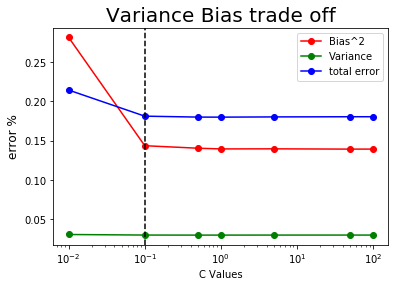

In [260]:
plt.plot(C_list, bias_list, 'o-', color="r",label="Bias^2")
#To better visualize variance(SE of coefs), we add a scaler .01
plt.plot(C_list, var_list*0.01, 'o-', color="g", label="Variance")
plt.plot(C_list, total*0.1, 'o-', color="b", label="total error")
plt.semilogx()
plt.legend(loc="best")
plt.title("Variance Bias trade off", fontsize =20)
plt.axvline(x=0.1,linestyle="--", color='black')
plt.xlabel('C Values')
plt.ylabel('error %', fontsize =12)
plt.show()

Text(0, 0.5, 'Error')

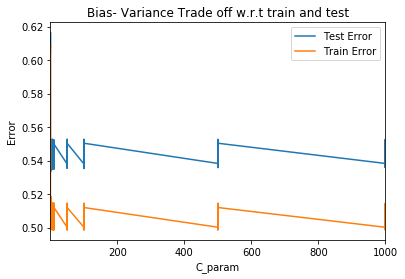

In [258]:
# plotting Bias Variance Trade off by looking at the ERRORS 
(1-grid_results[['mean_test_score','mean_train_score']]).plot()
plt.legend(['Test Error','Train Error'])
plt.title("Bias- Variance Trade off w.r.t train and test")
plt.xlabel("C_param")
plt.ylabel("Error")

# Discussion on Bias variance Trade off

**One of the most important param Regarding the bias variance trade off for Logistic Regression is 
C - since we have done our due diligence by choosing the best features already there 
is very little that can be done by Gridsearch . I chose to tune the Logistic regression 
coefficient C, class_weight and solver for bias vaiance analysis . for the best test accuracy,
result was found to be {C=0.5, class_weight={0: 0.4, 1: 0.6}, dual=False}**

*A narrow gap indicates low variance. Generally, the more narrow the gap, the lower the variance.
The opposite is also true: the wider the gap, the greater the variance. If the variance is high, then the model fits training data too well. When training data is fitted too well, the model will have trouble generalizing on data that hasn’t seen in training. When such a model is tested on its training set, and then on a validation set, the training error will be low and the validation error will generally be high. As we change training set sizes, this pattern continues, and the differences
between training and validation errors will determine that gap between the two learning curves.*

**The relationship between the training and validation error, and the gap can be summarized this way: 
So the bigger the difference between the two errors, the bigger the gap. The bigger the gap, 
the bigger the variance. In our case, the gap is very narrow, so we can safely conclude that the variance is low.**

### *Based on the results it is clear that the model is underfitting the data and performance can be improved by the below methods*
* More data will not generally help. It will, in fact, likely increase the training error. 
* Therefore we should increase more features. Because that expands the hypothesis space. 
* This includes making new features from existing features. Same way more parameters may also expand the hypothesis space.


In [225]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', normalize=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fmt = '.2f' if normalize else 'd'

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=15)
    plt.colorbar()
    plt.grid(False)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = (cm.max()+cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', size=15)
    plt.xlabel('Predicted label', size=15)


In [242]:
import itertools
from sklearn.metrics import make_scorer, confusion_matrix 
    
model_lr = linear_model.LogisticRegression(C=0.5, class_weight={0: 0.4, 1: 0.6})
X_train, X_test, y_train, y_test = train_test_split(df_pca.values,y, test_size = 0.2, random_state = 9)
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(X_train)  
xtest = sc_x.transform(X_test)
model_lr.fit(df_pca, y)
    
predictions = model_lr.predict(X_test)

y_test_pred = model_lr.predict(X_test)
y_train_pred = model_lr.predict(X_train)
predtest = model_lr.predict_proba(X_test)
predtrain = model_lr.predict_proba(X_train)

#finding the accuracy, precision and test_error
accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_test = precision_score(y_test , y_test_pred, average ='macro')
precision_train = precision_score(y_train , y_train_pred, average ='macro')

print("Accuracy_test: {}%".format(round(np.mean(accuracy_test),3)))
print("Accuracy_train: {}%".format(round(np.mean(accuracy_train),3))) 
print("precision_test: {}%".format(round(np.mean(precision_test),3)))
print("precision_train: {}%".format(round(np.mean(precision_train),3)))    

Accuracy_test: 0.499%
Accuracy_train: 0.5%
precision_test: 0.474%
precision_train: 0.485%


## The performance had improved by 3% after hyper parameter tuning

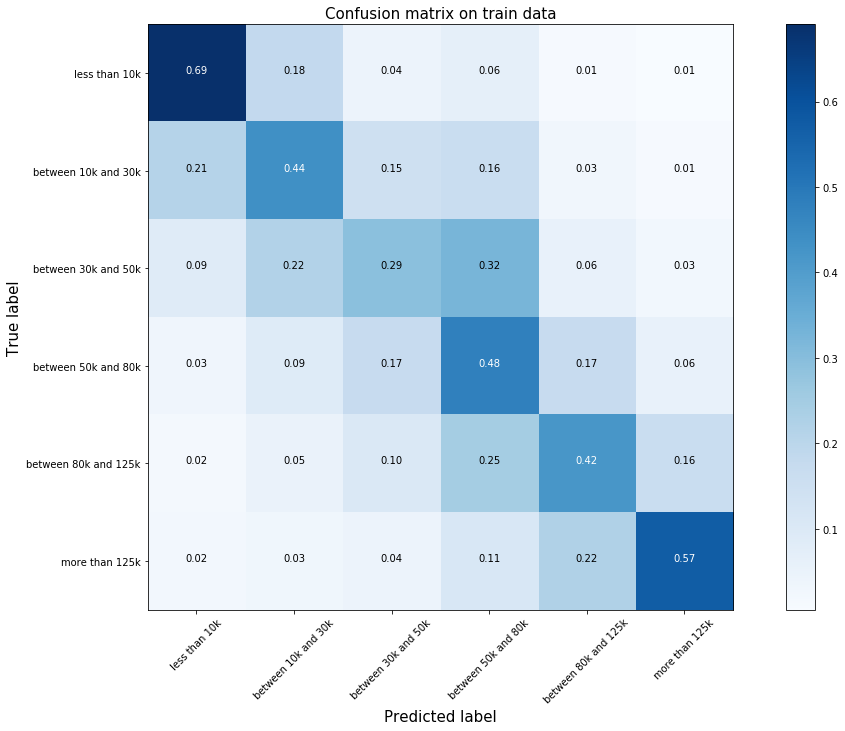

In [243]:

conf_mat_train = confusion_matrix(y_train,y_train_pred)
plot_confusion_matrix(conf_mat_train, classes, title='Confusion matrix on train data', normalize=True)


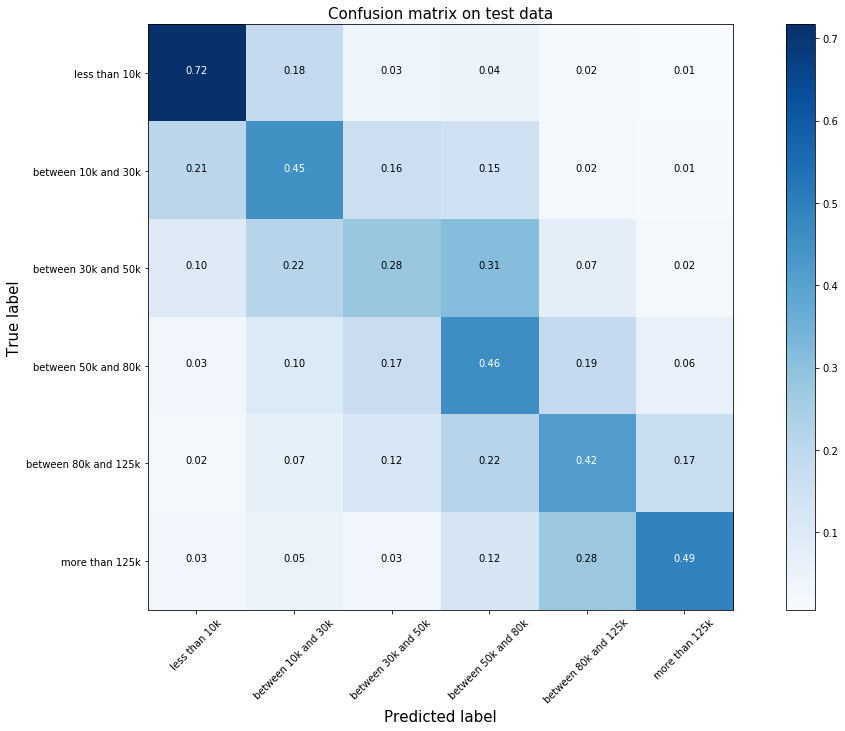

In [244]:

conf_mat_train = confusion_matrix(y_test,y_test_pred)
plot_confusion_matrix(conf_mat_train, classes, title='Confusion matrix on test data', normalize=True)


**Inference**

*As expected, low paid and high paid scientist are the easier to detect. 
Mostly because the range of high paid person I took is very wide, and because students are
easy to detect.*

# Testing on the main Dataset

*With the obtained model i tried to run on the main dataset to evaluate the performance*

In [254]:
predictions = model.predict(X_test)
resultsDF = pd.read_csv('Kaggle_Salary_clean.csv')
resultsDF = resultsDF.drop(resultsDF.index[0])
dic_target = {'0-10,000': 0, '10-20,000': 1, '20-30,000': 1, '30-40,000': 2, 
       '40-50,000': 2, '50-60,000': 3, '60-70,000': 3, '70-80,000': 3, 
       '80-90,000': 4, '90-100,000': 4, '100-125,000': 4, 
       '125-150,000': 5, '150-200,000': 5, '200-250,000': 5, 
       '250-300,000': 5, '300-400,000': 5, '400-500,000': 5, 
       '500,000+':5}

resultsDF['Q9_target'] = resultsDF['Q9'].apply(lambda x: dic_target[x])
resultsDF = resultsDF.drop(columns='Q9', axis=1)

resultsDF['Q9_pred'] = pd.Series(predictions)
resultsDF[['Q9_target', 'Q9_pred']].head(10)

c:\users\harik\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (1,3,9,11,22,24,25,26,27,28,29,45,57,65,84,86,88,108,110,124,126,151,195,209,224,250,263,265,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,305,307,323,326,327,330,342,372,385,386,394,395) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Q9_target,Q9_pred
1,1,3.0
2,0,1.0
3,0,0.0
4,1,5.0
5,0,0.0
6,1,0.0
7,5,5.0
8,2,0.0
9,2,0.0
10,1,5.0


# Discussion on the selected model

*Given the inherent issues with the data set and the subset of the problem I was looking at, 
I feel that nearly 50% of the accuracy accros various models explain the better feature selection.
Various performance measures like *Accuracy, Precision* has been performed on the hyperparameters and found that they give more or less the same results.*

*The test Accuracy_score can be attributed to the difference in distribution of the train and test set and the sparcity and randomness in the the dataset. The model does not look to be overfitting since the test set performed well with model created.*


However, I feel that the model could be improved much more using below mentiond methods 

    1. Spend more time on adding more relevant features and use feature selection 
    2. Better feature engineering - polynomial features to be introduced 
    3. Better utilisation of other text fields that was dropped to make data set simpler
    4. Conduct Gridsearch on more parameters for the different models like XGB,Decision trees etc..